<font size="6"><b>BASIC PROBABILITY DISTRIBUTIONS: CONTINUOUS DISTRIBUTIONS</b></font>

In [ ]:
library(data.table)
library(tidyverse)
library(plotly)
library(psych) # for pairwise scatter plots
library(estimators) # for theoretical moments
library(moments) # empirical moments
library(miscTools) # for ddnorm, derivative of normal distribution curve
library(MASS) # for multivariate normal distribution
#library(GGally) # for pairwise scatter plots
library(BBmisc) # for standardization

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

In [ ]:
options(htmlwidgets_embed=TRUE)

In [ ]:
options(knitr.kable.max_rows = 10)

![xkcd](../imagesba/normal_distribution.png)

(https://xkcd.com/2118/)

**Note:** For the interactive applications, please:

- Select file browser from the side bar through the symbol: 

- Open the Launcher by hitting the button: 

- Hit "Shiny" button from the Launcher:

  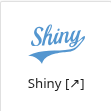

- Navigate to 05_prob_stat_1/apps/

Continuous probability distribution can take real values on the supported portion of the continuum. For Beta distribution the supported domain is the interval (0,1), while for the exponential and gamma distributions the supported domain is (0, $\infty$). For normal and Student's t distribution the supported domain is the whole continuum ($-\infty, \infty$).

For both discrete and continuous distributions, the range of cumulative distribution function is between 0 and 1 and cumulative distribution function is monotonically increasing between 0 and 1. 

However, for discrete distributions, the probability mass function can take on probabilities between 0 and 1 for discrete values.

For continuous distributions, any single point has a zero probability of occurence since the domain is the supported portion of the continuum. The probability density function show the instantenous change in the cumulative probability and can take on any positive values and can be above 1.

Both probability mass and probability density functions can have negative and positive slopes across their domains, so they don't have to be monotonically increasing functions.

So the cumulative distribution function is the integral of probability density function and probability density function is the derivative of the cumulative distribution function.

We can compare the cases of selected discrete and continuous distributions.

As an example of a discrete distribution, we can create two vertical subplots for the probability mass function and cumulative distribution function for binomial distribution:

In [ ]:
qvals1 <- 0:10

In [ ]:
p1 <- plot_ly(x = qvals1, y = dbinom(qvals1, 10, 0.3), type = "scatter", mode = "lines") %>%
  layout(
    xaxis = list(
      showspikes = TRUE, 
      spikemode = "across", 
      spikesnap = "cursor", 
      spikethickness = 1.5,
      spikecolor = "red"
    ),
    yaxis = list(showspikes = FALSE)
  )

p2 <- plot_ly(x = qvals1, y = pbinom(qvals1, 10, 0.3), type = "scatter", mode = "lines") %>%
  layout(
    xaxis = list(
      showspikes = TRUE, 
      spikemode = "across", 
      spikesnap = "cursor", 
      spikethickness = 1.5,
      spikecolor = "red"
    ),
    yaxis = list(showspikes = FALSE)
  )

subplot(p1, p2, nrows = 2, shareX = TRUE) %>%
  layout(
      title = "Binomial Distribution for p = 0.3 and n = 10",
    hovermode = "x unified",
      annotations = list(
 list(y = 0.9, text = "Probability Mass Function", showarrow = F, xref='paper', yref='paper'),
  list(y = 0.3, text = "Cumulative Distribution Function", showarrow = F, xref='paper', yref='paper'))
  )


As you see the probability mass function takes on values up to 1, cumulative distribution function is the cumulative sum of those discrete values.

Now as an example of continuous distributions, we can create two vertical subplots for the probability density function and cumulative distribution function for beta distribution and we will see in the next section what beta distribution is all about:

In [ ]:
qvals2 <- seq(0, 1, 0.001)

In [ ]:
p1 <- plot_ly(x = qvals2, y = dbeta(qvals2, 0.3, 0.3), type = "scatter", mode = "lines") %>%
  layout(
    xaxis = list(
      showspikes = TRUE, 
      spikemode = "across", 
      spikesnap = "cursor", 
      spikethickness = 1.5,
      spikecolor = "red"
    ),
    yaxis = list(showspikes = FALSE)
  )

p2 <- plot_ly(x = qvals2, y = pbeta(qvals2, 0.3, 0.3), type = "scatter", mode = "lines") %>%
  layout(
    xaxis = list(
      showspikes = TRUE, 
      spikemode = "across", 
      spikesnap = "cursor", 
      spikethickness = 1.5,
      spikecolor = "red"
    ),
    yaxis = list(showspikes = FALSE)
  )

subplot(p1, p2, nrows = 2, shareX = TRUE) %>%
  layout(
      title = "Beta Distribution for Shape Parameters α = 0.3 and β = 0.3",
    hovermode = "x unified",
      annotations = list(
 list(y = 0.8, text = "Probability Density Function", showarrow = F, xref='paper', yref='paper'),
  list(y = 0.3, text = "Cumulative Distribution Function", showarrow = F, xref='paper', yref='paper'))
  )


Here, the probability density function can take values above 1. When the slope of probability density function is negative, cumulative distribution function is concave, its slope is decreasing. When the slope of the probability density function positive, cumulative distribution function convex, its slope is increasing.

# Beta distribution

Under binomial distribution, we calculated the probabilities of having $k$ successes in $n$ trials in which probability of success is $p$.

Now let's take $k$ and $n$ as given, and calculate the probabilities of having $k$ successes in $n$ trials for different $p$ values:

Let's divide the whole domain of possible $p$ values between 0 and 1 into intervals of 0.001:

In [ ]:
pvals <- seq(0, 1, 0.001)

Let's select some arbitrary $k$ and $n$ values.

Foe example we can say, we tossed a coin only one time and got a head. So what is the likelihood of this data given different bias values. And repeat the same calculation when we have 2 and 3 tosses but still have only one head:

In [ ]:
dvals0 <- prop.table(dbinom(0, 0, pvals)) * length(pvals)
dvals1 <- prop.table(dbinom(1, 1, pvals)) * length(pvals)
dvals2 <- prop.table(dbinom(1, 2, pvals)) * length(pvals)
dvals3 <- prop.table(dbinom(1, 3, pvals)) * length(pvals)

Plot them:

In [ ]:
plot(pvals, dvals0, type = "l", ylim = c(0, 2.5), col = "green")
lines(pvals, dvals1, col = "red")
lines(pvals, dvals2, col = "blue")
lines(pvals, dvals3, col = "black")

- <span style="font-weight:bold;color:green;">Green</span> line shows the relative plausibilities of the bias values in the domain between 0 and 1 when no tosses has been conducted yet. Without any tosses yet, all bias values has the same flat probability. So we can be totally ignorant about the bias value before any experiment provided that we have no prior belief.
- <span style="font-weight:bold;color:red;">Red</span> line shows the relative plausibilities of different bias values while the data we have is 1 head in 1 toss. Bias values closer to 1 have more relative plausibility.
- <span style="font-weight:bold;color:blue;">Blue</span> line shows the updated plausibilities when we have a second toss which is tail, so at that time we have 1 head in 2 tosses. Now the bias values closer to 0.5 are more plausible, with a bump in the middle and the relative plausibilities decreasing towards to 0 and 1 extremes.
- <span style="font-weight:bold;color:black;">Black</span> line shows the situation when we have three tosses and still only one head. Now the plausibilities of bias values closer to 1 decreased further while, values closer to 0 became more plausible, with the bump shifting left.

The above simulation shows a discrete version of beta distribution the PDF of which is:

${\displaystyle P(p;\alpha ,\beta )={\frac {p^{\alpha -1}(1-p)^{\beta -1}}{\mathrm {B} (\alpha ,\beta )}}.}$

The domain of the beta distribution can be viewed as a probability, and in fact the beta distribution with shape parameters $\alpha$ and $\beta$ is often used to describe the distribution of a probability value p for a binomial distribution of $\alpha - 1$ successes in $\alpha + \beta - 2$ trials.

The beta function, ${\displaystyle \mathrm {B} }$, is a normalization constant to ensure that the total probability is 1. The binomial coefficient which appears in binomial distribution is a constant as ${\displaystyle {\binom {\alpha+\beta-2}{\alpha-1}}}$ so in the PDF of beta it can be considered to be a part of the beta function, the normalization constant.

The expected value or mean is:

${\displaystyle \mu =\operatorname {E} [X]={\frac {\alpha }{\alpha +\beta }}}$

The variance is:

${\displaystyle \operatorname {var} (X)={\frac {\alpha \beta }{\left(\alpha +\beta \right)^{2}\left(\alpha +\beta +1\right)}}}$

(https://en.wikipedia.org/wiki/Beta_distribution)

Note that the parameters for success and failures are incremented in $\alpha$ and $\beta$ parameters of beta distribution. Let's repeat the above simulation with beta distribution:

In [ ]:
dbetax <- function(a, b, x) x^(a-1)*(1-x)^(b-1)

In [ ]:
dvals0b <- dbeta(pvals, 1, 1)
dvals1b <- dbeta(pvals, 2, 1)
dvals2b <- dbeta(pvals,2, 2)
dvals3b <- dbeta(pvals, 2, 3)

In [ ]:
plot(pvals, dvals0b, type = "l", ylim = c(0, 2), col = "green")
lines(pvals, dvals1b, col = "red")
lines(pvals, dvals2b, col = "blue")
lines(pvals, dvals3b, col = "black")

The previous simulation was a discrete version sum of the values of which are normalized to 1, so can be considered as a probability mass function. The second simulation above is the PDF of continuous beta distribution so the range is not capped at 1. And the parametrization is different, the k and N parameters of the first simulation using binomial distribution are equal to $\alpha-1$ and $\alpha+\beta-2$ using the parameters of beta distribution.

This change of scale and the reparametrization are the only differences. Other than that the shapes are the same:

- <span style="font-weight:bold;color:green;">Green</span> flat line reflects the case where we have no success or failures so any $p$ value is equally probable. That is in fact the uniform distribution that we will see later.
- <span style="font-weight:bold;color:red;">Red</span> line is the case with 1 success and 0 failure. Density of $p$ values linearly increase in the domain from 0 to 1.
- <span style="font-weight:bold;color:blue;">Blue</span> line is the case with 1 success and 1 failure. Density is higher in the middle one for $p$ values closer to 0.5.
- <span style="font-weight:bold;color:black;">Black</span> line is the case with 1 success and 2 failures. Density now shifts to lower $p$ values.

And fact this progression shows one of the simplest case of Bayesian inference and the classical use case of beta distribution:

As you may recall, Bayes rule is basically:

${\displaystyle P(B | A) = \frac{P(B)P(A | B)}{P(A)}}$

Hidden behind these symbols, the true meaning can be understood as such:

- Let B be some hypothesis we want to test the probability of. We cannot directly observe hypothesis so we have to make an inference about it. For example the event of raining tomorrow may be an hypothesis, we cannot directly observe tomorrow's rain today.
- Let A be some evidence or data related to the hypothesis. We directly observe and measure the evidence, such as the meteorological conditions today

So the Bayes's rule in plain English is:

${\displaystyle\begin{align}
The\ (posterior)\\
probability\ of\ hypothesis
\\ given\ evidence
\end{align} =
\frac{
\begin{align}
The\ prior\ probability && * && The\ likelihood\ of\ evidence\\
of\ hypothesis && && given\ the\ hypothesis
\end{align}}{\mathit{The\ probability\ of\ evidence}}}$

Beta distribution can be used as a conjugate prior probability distribution for Bernoulli/binomial likelihood. But what is a conjugate prior?

In Bayesian probability theory, if, given a likelihood function ${\displaystyle p(x\mid \theta )}$, the posterior distribution ${\displaystyle p(\theta \mid x)}$ is in the same probability distribution family as the prior probability distribution ${\displaystyle p(\theta )}$, the prior and posterior are then called conjugate distributions with respect to that likelihood function and the prior is called a conjugate prior for the likelihood function ${\displaystyle p(x\mid \theta )}$.

A conjugate prior is an algebraic convenience, giving a closed-form expression for the posterior; otherwise, numerical integration may be necessary. Further, conjugate priors may clarify how a likelihood function updates a prior distribution.

(https://en.wikipedia.org/wiki/Conjugate_prior)

That explanation may seem to abstract, but we can clarify it with a concrete example.

The question is,

- We have a certain coin of a currency, denomination and vintage year.
- We have prior knowledge of certain number of tosses resulting in $\alpha - 1$  successes and $\beta - 1$ failures, which can be used to model as a prior distribution of biases.
- Now we collect new data with new tosses of the same coin, a total of $N$ tosses resulting in $z$ successes.
- What is the posterior distribution of the biases?

The model will be as follows:

- Let's model the prior distribution of biases $\theta$ as a beta distribution: ${\displaystyle beta(\theta|\alpha, \beta)}$
- The likelihood of the data for the range of bias values will be modeled by binomial distribution, normalized by the probability of data:
  ${\displaystyle \frac {binom(z, N|\theta)}{p(z,N)}}$
- And the magic happens: The posterior distribution ${\displaystyle beta(\theta|\alpha, \beta)\frac {binom(z, N|\theta)}{p(z,N)}}$ is equal to
${\displaystyle beta(\theta|\alpha + z, \beta + N - z)}$

So by using beta distribution as a conjugate prior distribution, to go from the prior to the posterior, we add $z$ to the $\alpha$ parameter and
$N - z$ to the $\beta$ parameter of the prior distribution.

Let's confirm it by simulation. Let:
- $\alpha = 2$
- $\beta = 3$
- $N = 4$
- $z = 3$

Get prior values:

In [ ]:
dprior <- dbeta(pvals, 2, 3)

Get likelihood values:

In [ ]:
dlhood <- prop.table(dbinom(3, 4, pvals)) * length(pvals)

Get posterior values

In [ ]:
dposterior <- dbeta(pvals, 2+3, 3+1)

Plot priors:

In [ ]:
plot(pvals, dprior, type = "l")

Plot likelihood:

In [ ]:
plot(pvals, dlhood, type = "l")

And confirm the shape with $likelihood=posterior/prior$ identiy

In [ ]:
plot(pvals, dposterior/dprior, type = "l")

Plot the posterior:

In [ ]:
plot(pvals, dposterior, type = "l")

Let's plot them together:

In [ ]:
plot(pvals, dprior, type = "l", col = "blue", ylim = c(0, 2.5))
lines(pvals, dlhood, col = "red")
lines(pvals, dposterior, col = "black")

See that the <span style="font-weight:bold;color:black;">posterior</span> is a compromise
between <span style="font-weight:bold;color:blue;">prior</span> and
<span style="font-weight:bold;color:red;">likelihood</span> 

So we start with a prior belief and update it with our new evidence to arrive at our posterior, the basis of Bayesian inference. Note that the posterior can serve as the prior for the next Bayesian updating with new evidence (e.g. new coin tosses).

(Kruschke 2015, Doing Bayesian Data Analysis: A Tutorial with R, JAGS and STAN, p. 126-134)

You can also play with the interactive app **Beta conjugate and binomial likelihood** under 06_prob_stat_2/apps with Shiny interface to simulate Bayesian updating with beta conjugate prior distribution. That is a very simple introduction to Bayesian modeling, which itself is based on simple main ideas. The beauty of this simplicity is very well summarized by Aubrey Clayton:

> No professional hand-holding is necessary for Bayesian inference, outside 
of perhaps advising on what sorts of probability models might apply to cer-
tain data-gathering procedures and what distributions would represent vari-
ous states of knowledge. Once those are determined, the inferential process is 
automatic and simply consists of using Bayes’ theorem, as Jaynes and Richard 
Cox showed was required by the rules of consistent logical reasoning when 
expressed in probabilities. Because the frequentist methods sometimes violate 
these rules, they will necessarily sometimes produce illogical results.
> ...
> So, with one tool, we can handle 
these basic examples as well as the pathological ones, plus anything in between.
But where do the problems facing working scientists actually fall on this

(Clayton 2021, Bernoulli's Fallacy: Statistical Logic and the Crisis of Modern Science, p.239)

and Ed Jaynes:

> What the orthodox literature invariably fails to recognize is that all of these difficulties are
resolved effortlessly by the uniform application of the single Bayesian method. In fact, once
the Bayesian analysis has shown us the correct answer, one can often study it, understand
intuitively why it is right, and, with this deeper understanding, see how that answer might
have been found by some ad hoc device acceptable to orthodoxy.
We shall illustrate this in later chapters by giving the solution to the aforementioned
>
> Our derivation showed that, from the standpoint of logic, the product rule (and therefore Bayes’
theorem) expresses simply the associativity and commutativity of Boolean algebra. This is what
gives us that greater freedom of action in calculations, leading in later chapters to the unrestricted
use of Bayes’ theorem, in which we have complete freedom to move propositions back and forth
between the left and right sides of our probability symbols in any way permitted by the product and
sum rules. This is a superb computational device – and by far the most powerful tool of scientific
inference – yet it is completely missing from expositions of probability theory based on the KSP (Kolmogorov System of Probability)
work (which do not associate probability theory with information or inference at all).

(Jaynes 2003, Probability Theory: The Logic of Science, p. 551,654)

# Higher moments

In probability theory and statistics, a central moment is a moment of a probability distribution of a random variable about the random variable's mean; that is, it is the expected value of a specified integer power of the deviation of the random variable from the mean.

For a continuous univariate probability distribution with probability density function f(x), the n-th central moment of a real-valued random variable $X$ about the mean ($\mu$) is:

${\displaystyle \mu _{n}=\operatorname {E} \left[{\left(X-\operatorname {E} [X]\right)}^{n}\right]=\int _{-\infty }^{+\infty }(x-\mu )^{n}f(x)\,\mathrm {d} x.}$

A standardized moment of a probability distribution is a moment (often a higher degree central moment) that is normalized, typically by a power of the standard deviation, rendering the moment scale invariant. The shape of different probability distributions can be compared using standardized moments.

The standardized moment of degree n is ${\displaystyle \mu _{n}/\sigma ^{n}}$ that is, the ratio of the n-th moment about the mean $\mu _{n}$ to the n-th power of the standard deviation,:

${\displaystyle \sigma ^{k}=\mu _{2}^{k/2}=\operatorname {E} \!{\left[{\left(X-\mu \right)}^{2}\right]}^{k/2}}$

Moments are useful to define the shape of distributions.

- Zeroth central moment and standardized moment are 1  since $x^0=1$
- First central moment and standardized moment are by definition zero (average distance to mean is zero)
- Second central moment is variance and second standardized moment is by definition 1 since central moment variance is divided by $\sigma^2$ which is itself variance
- Third and fourth moments are calculated as standardized moments and are denoted by $\tilde {\mu _n}$

Third standardized moment is skewness, a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean:

${\displaystyle {\tilde {\mu }}_{3}={\frac {\mu _{3}}{\sigma ^{3}}}={\frac {\operatorname {E} \left[(X-\mu )^{3}\right]}{\left(\operatorname {E} \left[(X-\mu )^{2}\right]\right)^{3/2}}}}$

There are two kinds of skewness a distribution can have:

- Negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the curve. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.

- Positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.

Fourth standardized moment is kurtosis, the degree of “tailedness” in the probability distribution of a real-valued random variable. It is related to the tails of the distribution, not its peak. Higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean:

${\displaystyle {\tilde {\mu }}_{4}={\frac {\mu _{4}}{\sigma ^{4}}}={\frac {\operatorname {E} \left[(X-\mu )^{4}\right]}{\left(\operatorname {E} \left[(X-\mu )^{2}\right]\right)^{4/2}}}}$

There are three types of kurtosis:

- Distributions with zero excess kurtosis are called **mesokurtic**, or mesokurtotic. The most prominent example of a mesokurtic distribution is the normal distribution family, regardless of the values of its parameters.

- A distribution with positive excess kurtosis is called **leptokurtic**, or leptokurtotic. A leptokurtic distribution has fatter tails. ("Lepto-" means "slender", originally referring to the peak. Examples of leptokurtic distributions include the Student's t-distribution, Rayleigh distribution, Laplace distribution, exponential distribution, Poisson distribution and the logistic distribution. Such distributions are sometimes termed super-Gaussian.

- A distribution with negative excess kurtosis is called **platykurtic**, or platykurtotic. A platykurtic distribution has thinner tails. ("Platy-" means "broad", originally referring to the peak. Examples of platykurtic distributions include the continuous and discrete uniform distributions, and the raised cosine distribution. The most platykurtic distribution of all is the Bernoulli distribution with p = 1/2 (for example the number of times one obtains "heads" when flipping a coin once, a coin toss), for which the excess kurtosis is −2.

(https://en.wikipedia.org/wiki/Central_moment)

(https://en.wikipedia.org/wiki/Standardized_moment)

(https://en.wikipedia.org/wiki/Skewness)

(https://en.wikipedia.org/wiki/Kurtosis)

We can calculate empirical moment values from the data using the above definitions or theorerical moments from the distribution parameters using their closed formed formulas.

For example, for beta distribution, skewness is defined as:

${\displaystyle \gamma _{1}={\frac {\operatorname {E} \left[\left(X-\mu \right)^{3}\right]}{\left(\operatorname {var} (X)\right)^{3/2}}}={\frac {2\left(\beta -\alpha \right){\sqrt {\alpha +\beta +1}}}{\left(\alpha +\beta +2\right){\sqrt {\alpha \beta }}}}.}$

And, excess kurtosis, defined as kurtosis minus 3, is defined as:

${\displaystyle {\begin{aligned}{\text{excess kurtosis}}&={\text{kurtosis}}-3\\&={\frac {\operatorname {E} [(X-\mu )^{4}]}{(\operatorname {var} (X))^{2}}}-3\\&={\frac {6[(\alpha -\beta )^{2}(\alpha +\beta +1)-\alpha \beta (\alpha +\beta +2)]}{\alpha \beta (\alpha +\beta +2)(\alpha +\beta +3)}}.\end{aligned}}}$

## Skewness

Let's first explore beta distributions with different skewness:

In [ ]:
qvals2 <- seq(0, 1, 0.001)

### Positive skewness

In [ ]:
a1 <- 3
b1 <- 10

In [ ]:
plot(qvals2, dbeta(qvals2, a1, b1), type = "l")

The distribution is right-skewed or positive skewed

The theoretical skewness value is:

In [ ]:
(2*(b1-a1)*sqrt(a1+b1+1)) / ((a1+b1+2)*sqrt(a1*b1))

Or easier by using `estimators` package:

In [ ]:
db1 <- Beta(a1,b1)
skew(db1)

In [ ]:
skew(db1)

Let's create a sample and calculate empirical skewness:

In [ ]:
ssize <- 1e4

In [ ]:
set.seed(1)
sampb1 <- rbeta(ssize, a1, b1)
hist(sampb1)

Mean and (population) standard deviation reversed for Bessel correction are calculated:

In [ ]:
meanb1 <- mean(sampb1)
sdb1 <- sd(sampb1)*sqrt((ssize - 1)/ssize)

The skewness is:

In [ ]:
mean((sampb1 - meanb1)^3) / (sdb1)^3

Or easier by using `moments` package:

In [ ]:
skewness(sampb1)

The skewness value is positive

### Negative skewness

In [ ]:
a2 <- 10
b2 <- 3

In [ ]:
plot(qvals2, dbeta(qvals2, a2, b2), type = "l")

The distribution is left-skewed or negative skewed

The theoretical skewness value is:

In [ ]:
(2*(b2-a2)*sqrt(a2+b2+1)) / ((a2+b2+2)*sqrt(a2*b2))

Or easier by using `estimators` package:

In [ ]:
db2 <- Beta(a2,b2)
skew(db2)

Let's create a sample and calculate empirical skewness:

In [ ]:
ssize <- 1e4

In [ ]:
set.seed(1)
sampb2 <- rbeta(ssize, a2, b2)
hist(sampb2)

Mean and (population) standard deviation reversed for Bessel correction are calculated:

In [ ]:
meanb2 <- mean(sampb2)
sdb2 <- sd(sampb2)*sqrt((ssize - 1)/ssize)

The skewness is:

In [ ]:
mean((sampb2 - meanb2)^3) / (sdb2)^3

Or easier by using `moments` package:

In [ ]:
skewness(sampb2)

The skewness value is negative

## Kurtosis

### Leptokurtosis

In [ ]:
a3 <- 50
b3 <- 5

In [ ]:
plot(qvals2, dbeta(qvals2, a3, b3), type = "l")

The distribution is leptokurtic, more extreme values in the tails, compared to the standard deviation of the distribution

The theoretical excess kurtosis value is:

In [ ]:
6*((a3 - b3)^2 * (a3 + b3 + 1) - a3*b3 * (a3 + b3 + 2)) / (a3 * b3 * (a3 + b3 + 2) * (a3 + b3 + 3))

Let's create a sample and calculate empirical kurtosis:

In [ ]:
ssize <- 1e4

In [ ]:
set.seed(1)
sampb3 <- rbeta(ssize, a3, b3)
hist(sampb3)

Mean and (population) standard deviation reversed for Bessel correction are calculated:

In [ ]:
meanb3 <- mean(sampb3)
sdb3 <- sd(sampb3)*sqrt((ssize - 1)/ssize)
meanb3
sdb3

The highest values that contribute to the kurtosis are:

In [ ]:
sort((sampb3 - meanb3)^4, decreasing = T)[1:10] / (sdb3)^4 

The excess kurtosis value is:

In [ ]:
mean((sampb3 - meanb3)^4) / (sdb3)^4 - 3

Or easier by using `moments` package:

In [ ]:
kurtosis(sampb3) - 3

The excess kurtosis is positive, distribution has fatter tails

### Platykurtosis

In [ ]:
a4 <- 1.5
b4 <- 1.5

In [ ]:
plot(qvals2, dbeta(qvals2, a4, b4), type = "l")

The distribution is platykurtic, less extreme values in the tails, compared to the standard deviation of the distribution

The theoretical excess kurtosis value is:

In [ ]:
6*((a4 - b4)^2 * (a4 + b4 + 1) - a4*b4 * (a4 + b4 + 2)) / (a4 * b4 * (a4 + b4 + 2) * (a4 + b4 + 3))

Let's create a sample and calculate empirical kurtosis:

In [ ]:
ssize <- 1e4

In [ ]:
set.seed(1)
sampb4 <- rbeta(ssize, a4, b4)
hist(sampb4)

Mean and (population) standard deviation reversed for Bessel correction are calculated:

In [ ]:
meanb4 <- mean(sampb4)
sdb4 <- sd(sampb4)*sqrt((ssize - 1)/ssize)
meanb4
sdb4

The highest values that contribute to the kurtosis are:

In [ ]:
sort((sampb4 - meanb4)^4, decreasing = T)[1:10] / (sdb4)^4 

The excess kurtosis value is:

In [ ]:
mean((sampb4 - meanb4)^4) / (sdb4)^4 - 3

Or easier by using `moments` package:

In [ ]:
kurtosis(sampb4)  - 3

The excess kurtosis is negative, the distribution has flatter tails.

You can also play around with **Higher Moments of Beta Distribution** app under 06_prob_stat_2/apps with Shiny interface to see how skewness and kurtosis changes with different $\alpha$ and $\beta$ parameters.

# Uniform distribution

The two basic physical tools that we simulated at the beginning of the probability sessions are coin and dice. Provided that they are fair, all possible values in the sample space has the same probability, and hence they are equiprobably:

- Each side to a fair coin has a 1/2 probability of occuring
- Each side to a fair die has a 1/6 probability of occuring

If we increase the number of the sides to a fair die - still keeping it fair - we will have more possible values $n$ each with a probability of $1/n$. In the limit we will have a perfect sphere dropped on a perfectly flat surface, so that any one of the $\infty$ points on the sphere has the same equal probability of $1/\infty=0$ while the total sample space $\Omega$ has a probability of 1. So the equiprobable discrete distribution converges to a continuous distribution.

Uniform distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds. The bounds are defined by the parameters, ${\displaystyle a}$ and 
${\displaystyle b,}$ which are the minimum and maximum values. The difference between the bounds defines the interval length; all intervals of the same length on the distribution's support are equally probable.

The probability density function for uniform distribution is:

${\displaystyle f(x)={\begin{cases}{\dfrac {1}{b-a}}&{\text{for }}a\leq x\leq b,\\[8pt]0&{\text{for }}x<a\ {\text{ or }}\ x>b.\end{cases}}}$

Expected value is:

${\displaystyle \operatorname {E} [X]={\frac {b+a}{2}}}$

Variance is:

${\displaystyle \operatorname {Var} [X]={\frac {(b-a)^{2}}{12}}}$

(https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

Let's get some samples from the standard uniform distribution with a support in the open interval (0, 1)

In [ ]:
set.seed(70)
unisamp <- runif(1e4, 0, 1)

In [ ]:
hist(unisamp)

Theoretical mean is:

In [ ]:
(0+1)/2

While the sample mean is:

In [ ]:
mean(unisamp)

Theoretical variance is:

In [ ]:
(1 - 0)^2 / 12

While the sample variance is:

In [ ]:
var(unisamp)

A useful aspect of standard uniformly distributed sample is that it can be used to be converted to samples of any distribution using the quantile functions, since basically every probability distributions CDF lies between 0 and 1.

So for example the standard uniform sample can be converted to a sample of beta values with parameters 0.5 and 0.5 (which is known as Jeffrey's prior from Harold Jeffrey):

In [ ]:
hist(qbeta(unisamp, 0.5, 0.5))

Confirm with:

In [ ]:
set.seed(75)
hist(rbeta(1e4, 0.5, 0.5))

Poisson with a rate of 20:

In [ ]:
hist(qpois(unisamp, 20))

Confirm with:

In [ ]:
set.seed(76)
hist(rpois(1e4, 20))

We will use uniform distribution to demonstrate central limit theorem later.

# Exponential distribution

The exponential distribution is the probability distribution of the distance between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate.

The distance parameter could be any meaningful mono-dimensional measure of the process, such as time between production errors, or length along a roll of fabric in the weaving manufacturing process.

It is the continuous analogue of the geometric distribution, and it has the key property of being memoryless.

(https://en.wikipedia.org/wiki/Exponential_distribution)

As you may recall from geometric distribution, the probabilities of successive discrete values in the probability mass function decay at a constant rate: The ratio between two successive values is always the same.

Since exponential distribution is the continuous analogue of geometric distribution, the rate of change between the probabilities of equally spaced values in probability density fuction is always the same. To illustrate let's make the log transformation because log transformation converts the division in rate of change calculation to a difference operation:

In [ ]:
diff(log(dexp(0:10, 1/2)))

The density is plotted as such:

In [ ]:
plot(dexp(seq(0, 10, 0.1), 1/2), type = "l")

While the log density is a linear shape:

In [ ]:
plot(log(dexp(seq(0, 10, 0.1), 1/2)), type = "l")

Which is quite obvious since logarithm is the inverse of exponentiation:

In [ ]:
log(exp(0:10))

The mean or expected value of an exponentially distributed random variable $X$ with rate parameter $\lambda$ is given by:

${\displaystyle \operatorname {E} [X]={\frac {1}{\lambda }}}$

The variance of $X$ is given by

${\displaystyle \operatorname {Var} [X]={\frac {1}{\lambda ^{2}}}}$

We will first simulate a disrete version of a Poisson point process with Bernoulli trials to show that the geometric waiting times between consecutive successes converge to an exponential distribution.

And then do the reverse, sample waiting times from an exponential distribution and show that the event counts form a Poisson point process and obey the Poission distribution.

Exponential distribution is useful for describing wealth distribution inequalities. We will make a simple agent-based simulation of fair trade in an economy and see how laws of nature drive the wealth distribution towards inequality in the form of an exponential distribution.

Exponential distribution is also a critical tool in survival analysis cases where the hazard rate is assumed to be constant. So in the end of the section, we will simulate a hypothetical living population with a constant mortality rate and show that the life expectancy obeys an exponential distribution.

## Poisson process simulation from Bernoulli trials

We know that when the number of trials is large and the probability of success is low, binomial distribution converges to Poisson distribution. For this reason, we will simulate 1e7 Bernoulli trials with a success probability of 0.5%. To show convergence to Poisson, we will treat each 1e3 trials as a unit interval so the expected rate of success is 5.

So these 1e7 trials are supposed converge to 1e4 Poisson samples.

1e7 Bernoulli trials with a success probability of 0.5%:

In [ ]:
set.seed(2)
bernpois <- rbinom(1e7, 1, 5/1000)

Check total number of successes:

In [ ]:
sum(bernpois)

Since each 1e3 trial is considered an interval, we assume to have sampled 1e4 Poisson counts with a rate of 5.

Let's check whether two distributions converge

In [ ]:
set.seed(3)
samppois <- rpois(1e4, 5)

Check the number of successes:

In [ ]:
sum(samppois)

And the historgram:

In [ ]:
hist(samppois)

Now let's treat 1e7 trials as a matrix of 1e3 columns (for each interval) and 1e4 samples, and get the counts for each interval:

In [ ]:
samppois2 <- rowSums(matrix(bernpois, ncol = 1000))

And see the distribution:

In [ ]:
hist(samppois2)

Histograms reveal convergence

In [ ]:
plot(prop.table(table(samppois2)), type = "l", col = "red")
lines(0:20, dpois(0:20, 5), col = "blue")

Line plots of relative counts also confirm the convergence: Our discrete Bernoulli trials, compressed into 1000 trial intervals converge to Poisson distribution.

Poisson point process is the sequence of events arrival times of which are exponentially distributed.

To see that discrete geometric arrival times converge to continuous exponential distribution, we will treat the sequence of discrete Bernoulli trials as a continuous Poisson point process.

Now, in order to calculate the failure lengths or arrival times, we will compress the data in the run lengths:

In [ ]:
bernpoisrl <- rle(bernpois)
setDT(bernpoisrl)

In [ ]:
bernpoisrl %>% head

Get the non-zero waiting times:

In [ ]:
bernpois_wt <- bernpoisrl[values == 0, lengths]

And calculate the total number of zero waiting times as sum of decremented run lengths of successes. So if there is a run length of 3 successes, we have 2 zero length waiting times in between:

In [ ]:
nzero <- bernpoisrl[values == 1, sum(lengths - 1)]

We combine all zero and non-zero waiting times

In [ ]:
bernpois_wt2 <- c(bernpois_wt, rep(0, nzero))

And convert the discrete waiting times to continuous ones such that 1000 trials make up an interval:

In [ ]:
bernpois_wt3 <- bernpois_wt2 / 1000

In [ ]:
length(bernpois_wt2)

In [ ]:
summary(bernpois_wt2)

See the distribution of waiting times extracted from discrete Bernoulli trials:

In [ ]:
hist(bernpois_wt3)

Variance is:

In [ ]:
var(bernpois_wt3)

Mean is:

In [ ]:
mean(bernpois_wt3)

Now let's sample 5e4 values from an exponential distribution with a rate of 5:

In [ ]:
set.seed(3)
sampexp <- rexp(5e4, 5)

In [ ]:
hist(sampexp)

In [ ]:
var(sampexp)

In [ ]:
mean(sampexp)

Theoretical mean of geometric distribution with a p of 5/1000 and converted from a count to a rate by dividing by 1000 is:

In [ ]:
((1 - 5/1000) / (5 / 1000))/1000

Theoretical variance of geometric distribution with a p of 5/1000 and converted from the scale of counts to the scale of rates by dividing by 1000^2 is:

In [ ]:
((1 - 5/1000) / (5 / 1000)^2)/1e6

The theoretical mean of exponential distribution with a rate of 5 is:

In [ ]:
1/5

And the theoretical variance is:

In [ ]:
1/5^2

And last, let's compare the densities:

In [ ]:
bpd <- density(bernpois_wt3)

In [ ]:
bpd2 <- density(sampexp)

In [ ]:
bpd_s <- as.data.table(bpd[c("x", "y")])[x >= 0.03]

In [ ]:
bpd2_s <- as.data.table(bpd2[c("x", "y")])[x >= 0.03]

In [ ]:
plot(bpd_s, type = "l", col = "blue")
lines(bpd2_s, col = "red")
lines(seq(0, 2, length.out = 101), dexp(seq(0, 2, length.out = 101), 5), col = "black")

The empirical densities we get

- From Bernoulli trials with a p of 0.5% and 1000 trials compressed into an interval
- From simulations from exponential distribution with a rate of 5
- And theoretical exponential distribution with a rate of 5

all overlap perfectly!

So we see that exponential distribution can be derived empirically from simple discrete Bernoulli trials

## Poisson process simulation from exponential distribution

We have demonstrated that, Bernoulli trials with a low probability and high trial number converge to a Poisson distribution and the discrete waiting times with geometric distribution converge to exponential distribution.

Now we will do the continuous analogue from the other way around: We will sample continuous waiting times for a Poisson point process from an exponential distribution and show that the counts form a Poisson distribution.

We reuse the same code to create the exponentially distributed sample from previous section:

In [ ]:
set.seed(3)
sampexp <- rexp(5e4, 5)

In [ ]:
hist(sampexp)

Variance and mean:

In [ ]:
var(sampexp)

In [ ]:
mean(sampexp)

And total time:

In [ ]:
sum(sampexp)

We first get the cumulative sum of waiting times:

In [ ]:
sampexpc <- cumsum(sampexp)

In [ ]:
summary(sampexpc)

Then we wrangle the data to get the distribution of the number of events per 1 interval:

In [ ]:
counts1 <- sapply(split(sampexpc, round(sampexpc)), length)

Confirm the sum of counts is equal to the number of points created:

In [ ]:
sum(counts1)

Get the time intervals with no points until:

In [ ]:
round(max(sampexpc))

In [ ]:
zerocounts <- setdiff(0:round(max(sampexpc)), as.integer(names(counts1)))

In [ ]:
zerocounts

Augment the counts with zero count intervals:

In [ ]:
counts1b <- c(counts1, rep(0, length(zerocounts)))

In [ ]:
length(counts1b)

In [ ]:
sum(counts1b)

The contingency table of counts itself reveals a Poisson distribution:

In [ ]:
countst1 <- table(counts1b)

In [ ]:
countst1

And also the histogram:

In [ ]:
hist(counts1)

And compare the PMF of the simulated counts and Poisson distribution with a rate of 5:

In [ ]:
plot(prop.table(countst1), type = "l", col = "blue")
lines(0:20, dpois(0:20, 5), col = "red")

They almost totally overlap! So the Poisson point process with waiting times from an exponential distribution with a rate of 5 events per unit interval results in a count distribution from a Poisson distribution with a rate of 5

The empirical mean and variance of the count distribution:

In [ ]:
mean(counts1b)

In [ ]:
var(counts1b)

Is in line with theoretical mean and variance of a Poisson distribution with rate 5:

In [ ]:
mean(Pois(5))

In [ ]:
var(Pois(5))

Now let's use the same waiting times to get the counts of successes or events per 10 time interval:

In [ ]:
sampexpc10 <- sampexpc / 10

In [ ]:
counts10 <- sapply(split(sampexpc10, round(sampexpc10)), length)

Confirm the sum of counts is equal to the number of points created:

In [ ]:
sum(counts10)

Get the time intervals with no points until:

In [ ]:
round(max(sampexpc10))

In [ ]:
zerocounts10 <- setdiff(0:round(max(sampexpc10)), as.integer(names(counts10)))

In [ ]:
zerocounts10

No 10 unit intervals with zero counts.

Anyway, augment the counts with zero "zero" count intervals:

In [ ]:
counts10b <- c(counts10, rep(0, length(zerocounts10)))

In [ ]:
length(counts10b)

In [ ]:
sum(counts10b)

The contingency table of counts itself reveals a Poisson distribution:

In [ ]:
countst10 <- table(counts10b)

In [ ]:
countst10

And also the histogram:

In [ ]:
hist(counts10)

Get the density of count data to smooth out wigglyness:

In [ ]:
counts10d <- density(counts10)

In [ ]:
counts10dt <- as.data.table(counts10d[c("x", "y")])[x >= 0]

And compare the PMF of the simulated counts and Poisson distribution with a rate of 50:

In [ ]:
plot(counts10dt, type = "l", col = "blue")
lines(0:75, dpois(0:75, 50), col = "red")

They almost totally overlap again! So the Poisson point process with waiting times from an exponential distribution with a rate of 5 events per 1 unit interval results in a count distribution from a Poisson distribution with a rate of 50 when the count data for ten interval groups are aggregated.

The empirical mean and variance of the count distribution:

In [ ]:
mean(counts10b)

In [ ]:
var(counts10b)

Is in line with theoretical mean and variance of a Poisson distribution with rate 50:

In [ ]:
mean(Pois(50))

In [ ]:
var(Pois(50))

That's the beauty of Poisson distribution: We can stretch or contract the time intervals to get a new count data and it will conform to a Poission distribution with a rate multiplied by the number of intervals!

In this case we could get a Poisson distributed count data with a rate of 50 events per 10 time interval by aggregating Poisson distributed count data with a rate of 5 events per time interval by compressing the data of 10 consecutive intervals into one.

## Wealth distribution

Now let's simulate financial transactions among the participants in a small economy using agent-based simulation.

The idea is simple: All participants start out with the same wealth. In every iteration (period), all agents are matched and 1 unit is exchanged randomly from one side to the other.

The probability of giving or taking does not depend on the size of current wealth. So we can assume that the rules of trade are completely fair. The only restriction is that noone is allowed to go below zero wealth. And to ensure that zero wealth agents are not excluded out of further trade, at the beginning of each iteration each zero wealth agents receive 1 unit randomly from a separate non-zero wealth agent.

So in each iteration a single agent can give or receive at most 1 units.

We create 1e3 agents, each with 20 units of initial wealth. And see what happens after 5e3 iterations:

In [ ]:
nagent <- 1e3
niter <- 5e3
initw <- 20

In [ ]:
set.seed(80)
wealth_dt <- data.table(wealth = rep(initw, nagent), match = rep(0, nagent))

Check the starting total wealth:

In [ ]:
wealth_dt[, sum(wealth)]

In [ ]:
set.seed(90)
for (i in 1:niter)
{
    zerow <- wealth_dt[wealth == 0, .N]
    wealth_dt[, wealthnew := wealth]
    wealth_dt[wealth == 0, wealthnew := 1]
    wealth_dt[wealth > 0, match := sample(c(rep(-1, zerow), rep(0, .N - zerow)))]
    wealth_dt[match == -1, wealthnew := wealth - 1]
    wealth_dt[wealth > 0 & match != -1, match := sample(.N) - 1]
    wealth_dt[wealth > 0 & match != -1, wealthnew := wealth + sample(c(-1,1), .N), by = match %/% 2]
    wealth_dt[, wealth := wealthnew]
}

Check the ending total wealth:

In [ ]:
wealth_dt[, sum(wealth)]

See the histogram of ending wealth distribution:

In [ ]:
hist(wealth_dt[, wealth], breaks = 30)

See the largest wealth values:

In [ ]:
wealth_dt[, sort(wealth, decreasing = T)][1:10]

Now let's sample values from exponential distribution with a rate of reciprocal of initial wealth:

In [ ]:
set.seed(95)
wealth_exp <- rexp(nagent, 1/initw)
round(sort(wealth_exp, decreasing = T))[1:10]
hist(wealth_exp, breaks = 30)

The extreme values from the simulation and sampled exponential values are quite close

Calculate the density of simulated wealths:

In [ ]:
wealth_dens <- density(wealth_dt[wealth > 0, wealth])[c("x", "y")]
setDT(wealth_dens)
maxx <- wealth_dens[, max(x)]

And compare with theoretical density with a rate of reciprocal of initial wealth:

In [ ]:
plot(wealth_dens[x > 10], type = "l", col = "blue")
lines(10:maxx, dexp(10:maxx, 1/initw), col = "red")

The densities almost perfectly overlap. So even fair laws of nature result in wealth inequality with an exponential distribution

## Life expectancy with constant hazard rate

Exponential distribution is also useful in survival analysis where the hazard rate is constant.

Let's create a new born population of 1e4 people

In [ ]:
life_dt <- data.table(dead = rep(0, 1e4), life = rep(0, 1e4))

And set the hazard rate - proportion of still alive population to die in the period - to 10%

In [ ]:
rate <- 0.1

Initialize the period:

In [ ]:
periodx <- 0

Randomly sample from live population using Bernoulli trials with a bias of 0.1 and record the age (period) of each individual when they die.

Continue until no one stays alive:

In [ ]:
set.seed(5)
while(life_dt[dead == 0, .N] > 0)
{
    periodx <- periodx + 1
    life_dt[dead == 0, dead := rbinom(.N, 1, rate)]
    life_dt[dead == 1 & life == 0, life := periodx]
}

Check the inidivuduals who die at the oldest age:

In [ ]:
life_dt[, sort(life, decreasing = T)][1:10]

In [ ]:
periodx

Histogram of simulated life expectancies:

In [ ]:
hist(life_dt$life)

The mean life expectancy:

In [ ]:
life_dt[, mean(life)]

Simulate from exponential distribution with the same hazard rate:

In [ ]:
set.seed(5)
leexp <- rexp(1e4, rate)
hist(leexp)

In [ ]:
round(sort(leexp, decreasing = T)[1:10])

In [ ]:
life_dens <- density(life_dt[, life])[c("x", "y")]
setDT(life_dens)
maxx <- life_dens[, max(x)]

And compare with theoretical density with a rate of reciprocal of initial wealth:

In [ ]:
plot(life_dens[x > 10], type = "l", col = "blue")
lines(10:maxx, dexp(10:maxx, rate), col = "red")

And the densities almost perfectly overlap.

We saw that, exponential distribution occurs in different areas that are governed by simple laws of nature, like Bernoulli trials with a bias, totally random and fair equal sized transactions and demographics with a fixed mortality rate.

# Normal distribution

There are some famous bells in history ...

Cowbell of İnek Şaban:

<video src="../imagesba/cowbell2.mp4"  
       controls width="500">
</video>

School bell of Hafize Ana:

<video src="../imagesba/hazife_ana2.mp4"  
       controls width="500">
</video>

Bell of the Notre-Dame de Paris:

<img src="../imagesba/notredame.png" width="500"/>

And the bell curve of normal distribution:

<img src="../imagesba/galtonboard2.jpg" width="500"/>

The formula that generates the above curve is as such:

$${\huge
{\bf
f(x)={
\frac
{1}{\sqrt {2\pi \sigma ^{2}}
}
}e^
{
{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}
}
}
}
}
}
$$

It seems like quite an ugly and complicated formula. But we can always simplify a complicated thing to its basic constituents:

<video src="../imagesba/connery4.mp4"  
       controls width="1000">
</video>

<table>
<tr>
<th> So let's simplify Sean Connery: </th>
<th> Into İbrahim Abi: </th>
</tr>
<tr>
<td>

<img src="../imagesba/connery.jpg" width="200"/>
</td>
<td>

<img src="../imagesba/ibrahim_abi.jpg" width="200"/>

</td>
</tr>
</table>

The <span style="font-weight:bold;color:red;">red</span> part is just a normalizing constant so that the integral of the formula or the area under the curve sums up to 1:

$${\huge
{\bf
{
\color{red}
{
\frac
{1}{\sqrt {2\pi \sigma ^{2}}
}
}}e^
{
\color{blue}
{
{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}
}
}
}
}
}
}
$$

Let's get rid of that part:

$${\huge
{\bf
e^
{
\color{blue}
{
{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}
}
}
}
}
}
}
$$

The <span style="font-weight:bold;color:blue;">blue</span> part centers and scales $x$ so that we always get a similar curve, centered on 0 and with the same width. Let's assume $\mu=0$ and $\sigma=1$. We can also get rid of the 2 in the denominator, so the formula boils down to:

$${\huge
{\bf
e^{-x^2}
}
}
$$

In [ ]:
xvals <- seq(-3, 3, 0.001)
plot(xvals, exp(-(xvals^2)), type = "l")

Now we confirm that the simple form $\bf {e \text{ \bf to the power of minus squared } x}$ creates the famous bell shape.

Let's see why that shape.

## Error curve: From Simpson and Laplace to Gauss

The historical accounts and proofs here are mostly taken from Stahl 2006, The Evolution of Normal Distribution

Chronographically the first idea of a bell curve came from Abraham De Moivre in 1733 when he was searching for an approximation formula for binomial distribution of large N numbers. That was a practical need before the advent of electronic calculators.

We will come to that normal approximation to binomial with simulation.

The need to come up with a curve arose from errors in astronomical observations: If the observations about a celestial body are prone to measurement error, how should astronomers proceed to decide on a certain quantity from these observations.

Thomas Simpson proposed the first error curves denoting the probability density of measurement errors. In 1774 Pierre Simon Laplace also came up with his version of an error curve with a different shape.

Let's explore some different curves...

The values around zero, linearly, not so useful because their probabilities are not symmetric around zero:

In [ ]:
plot(xvals, type = "l")

The absolute value is symmetric but, the center value is not the tip of the curver:

In [ ]:
plot(abs(xvals), type = "l")

Let's take its negative but the density is not too concentrated around the center, similar to Simpson's curve:

In [ ]:
plot(-abs(xvals), type = "l")

Exponentiate it, now center is more concentrated but the tip is not curved but pointed, not differentiable. This is Laplace's first curve:

In [ ]:
plot(exp(-abs(xvals)), type = "l")

And at last, when Giuseppe Piazzi discovered minor planet Ceres in 1801, it was occulted behind the Sun shortly after, leaving only a handful observations. There was a race towards guessing where Ceres should reappear.

Carl Friedrich Gauss estimated an area in sky that did not agree with the estimations of others and he was right!

He had three assumptions:

- Small errors are more likely than large errors, hence curve has a maximum at 0
- Curve is symmetric: likelihoods of $\epsilon$ and $-\epsilon$ are the same
- The most likely value is the average of measurements

In [ ]:
plot(xvals, exp(-(xvals^2)), type = "l")

Simplified proof of Gauss is as follows, without going into too much mathematical rigor:

The density function is defined as $\phi(x)$. The joint density function for the likelihood of data $M$ is:

$\large {\Omega=\prod_{i=1}^{n}\phi(M_i - \bar{M})}$

where $\bar{M}$ is the average of observations.

In plain English: The product of the density or likelihood values for all errors

with some omitted rigorous steps, we get that:

$\large {\sum_{i=1}^{n}\frac{\phi'(M_i - \bar{M})}{\phi(M_i - \bar{M})}} = 0$

In plain English again: The sum of the ratios of the derivative of the likelihood function to the likelihood function itself for all data values is zero.

With again some omitted steps, we derive the following differential equation:

$\large {\frac{\phi'(x)}{\phi(x)} = kx}$

In plain English: The ratio of the derivative of the likelihood function to the likelihood function itself for a data value should be a constant times that data value.

And the solution to this differential equation suggests that, simplified version of our function has to be in the form of:

$${\huge
{\bf
e^{-x^2}
}
}
$$

where

- the exponent ensures the bulge in the middle with thinner tails
- squared power ensures that we have a symmetric curve with a smooth extreme in the middle
- And negative of the power ensures that the extreme in the middle is a maximum

Now let's see whether Gauss was right in his proof.

First get the density values:

In [ ]:
rdvals <- dnorm(xvals)

Plot the ratio of the difference of densities to densities themselves:

In [ ]:
plot(xvals[-1], diff(rdvals) / rdvals[-1], type = "l")

Or better calculating the derivative of the normal distribution curve at the data points:

In [ ]:
rddvals <- ddnorm(xvals)

In [ ]:
plot(xvals, rddvals / rdvals, type = "l")

We confirrm the negative constant multiplied by data values in line with:

$\large {\frac{\phi'(x)}{\phi(x)} = kx}$

And to confirm that:

$\large {\sum_{i=1}^{n}\frac{\phi'(M_i - \bar{M})}{\phi(M_i - \bar{M})}} = 0$

In [ ]:
sum(rddvals / rdvals)

Quite close to zero

## Normal Approximation to Binomial: De Moivre

In 1712 Willem 's Gravesande wanted to test the hypothesis that male and female are equally likely using birth data in London between 1629-1710.

Taking the average of annual births as 11,429 and calculating the range of male birth ratios and multiplying with the average annual births he got the bounds for male births as between 5,745 and 6,128.

For us the hypothesis is quite easy to test the hypothesis for a single year:

In [ ]:
pbinom(6128, 11429, 0.5) - pbinom(5744, 11429, 0.5)

In [ ]:
sum(dbinom(5745:6128, 11429, 0.5))

While 's Gravesande used the recursion of Newton:

${\displaystyle {\binom {n}{x+1}}={\binom {n}{x}}{\frac {n-x}{x+1}}}$

For a rational approximation, it was still quite a laborous task back in 1712.

(Stahl 2006, The Evolution of Normal Distribution)

In 1733, Abraham De Moivre proved that:

${\large {n \choose k}\,p^{k}q^{n-k}\simeq {\frac {1}{\sqrt {2\pi npq}}}\,e^{-{\frac {(k-np)^{2}}{2npq}}},\qquad p+q=1,\ p,q>0}$

(https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem)

Let's check:

In [ ]:
nx <- 1000
kx <- 318
px <- 0.3
qx <- 1 - px

In [ ]:
dbinom(kx, nx, px)

In [ ]:
(1/sqrt(2*pi*nx*px*qx))*exp(-(kx - nx*px)^2 / (2*nx*px*qx))

Note that, the function has the same basic form as the normal distribution curve:



$${\huge
{\bf
e^{-x^2}
}
}
$$

Now let's see how binomial distribution converges to normal distribution with large n:

Let's remember the mean and variance and binomial distribution:

Expected value is:

${\displaystyle \operatorname {E} [X]=np}$

And variance is:

${\displaystyle \operatorname {Var} (X)=npq=np(1-p)}$

We write a function to plot the densities of both curves:

In [ ]:
binnorm <- function(nx, bias)
{
    dbin <- dbinom(0:nx, nx, bias)
    meanbin <- nx * bias
    varbin <- nx * bias * (1 - bias)
    sdbin <- sqrt(varbin)
    dnor <- dnorm(0:nx, meanbin, sdbin)
    plot(0:nx, dbin, type = "l", col = "blue", ylim = c(min(c(dbin, dnor)), max(c(dbin, dnor))))
    lines(0:nx, dnor, col = "red")
}

For $n = 2$:

In [ ]:
binnorm(2, 0.5)

For $n = 5$:

In [ ]:
binnorm(5, 0.5)

For $n = 10$:

In [ ]:
binnorm(10, 0.5)

For $n = 20$:

In [ ]:
binnorm(20, 0.5)

You can also play around with the **Binomial to Normal Distribution** application under 06_prob_stat_2/apps with Shiny interface.

Galton Board, invented by Francis Galton, who coined the term regression, is an analogue simulation that demonstrates that binomial distribution converges to normal distribution with large $N$:

<video src="../imagesba/galton.mp4"  
       controls width="300">
</video>

## Normal Approximation to Poisson Distribution

Since Poisson distribution is a limiting case of binomial distribution, where N approaches infinity while p approaches 0, Poisson distribution converges normal distribution for large rate values:

In [ ]:
poisnorm <- function(nx, rate)
{
    dp <- dpois(0:nx, rate)
    meanpois <- rate
    varpois <- rate
    sdpois <- sqrt(varpois)
    dnor <- dnorm(0:nx, meanpois, sdpois)
    plot(0:nx, dp, type = "l", col = "blue", ylim = c(min(c(dp, dnor)), max(c(dp, dnor))))
    lines(0:nx, dnor, col = "red")
}

In [ ]:
poisnorm(5, 2)

In [ ]:
poisnorm(10, 3)

In [ ]:
poisnorm(20, 12)

In [ ]:
poisnorm(50, 20)

In [ ]:
poisnorm(100, 45)

You can also play around with the **Poisson to Normal Distribution** under 06_prob_stat_2/apps with Shiny interface.

## Independent and Identically Distributed Random Variables

A collection of random variables is independent and identically distributed (i.i.d., iid, or IID) if each random variable has the same probability distribution as the others and all are mutually independent.

- Identically distributed means that there are no overall trends — the distribution does not fluctuate and all items in the sample are taken from the same probability distribution.
- Independent means that the sample items are all independent events. In other words, they are not connected to each other in any way;[2] knowledge of the value of one variable gives no information about the value of the other and vice versa.


(https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)

To show the concepts of identically distributed and/or independent variables, we will generate random variables from multivariate normal distribution and diagnose their distributions and correlations.

Since the version of central limit theorem that we cover here requires the variable to be i.i.d, we first run simulations how independent/not-independent and identically/unidentically distributed variables are diagnosed:

### Independent and Identically Distributed

First let's create 3 i.i.d variables, all with mean 0 and standard deviation 2:

In [ ]:
nv <- 3

Vector of fixed means:

In [ ]:
means <- rep(0, nv)
means

Fixed standard deviations as a diagonal matrix:

In [ ]:
sds <- diag(rep(2, nv))
sds

Correlation matrix where all non-diagonal entries are zero:

In [ ]:
corm <- diag(rep(1, nv))
corm

The covariance matrix:

In [ ]:
covr <- sds %*% corm %*% sds
covr

Create the sample:

In [ ]:
set.seed(3)
samp_iid <- mvrnorm(1e3, means, covr)
samp_iid <- as.data.table(samp_iid)

See their sd, mean and five point summaries, they are identical:

In [ ]:
samp_iid %>% lapply(function(x) c(SD = sd(x), as.list(summary(x)))) %>% rbindlist %>% round(2)

See their cross correlations, they are independent:

In [ ]:
round(cor(samp_iid), 2)

Pairwise scatterplots:

In [ ]:
#ggpairs(samp_iid)
pairs.panels(samp_iid)

See that, scatter plots form clouds, with no apparent correlation and scales and distributions of the variables are identical.

### Independent but Not Identically Distributed

First let's create 3 variables, means and standard deviation of which are randomly drawn from respective distributions so that they are not identical.

Means from normal distribution:

In [ ]:
set.seed(1)
means <- rnorm(nv, 0, 2)
means

Standard deviations from exponential distribution, since they should always be positive:

In [ ]:
set.seed(2)
sds <- diag(rexp(nv, 1/2))
sds

Correlation matrix where all non-diagonal entries are zero:

In [ ]:
corm <- diag(rep(1, nv))
corm

The covariance matrix:

In [ ]:
covr <- sds %*% corm %*% sds
covr

Create the sample:

In [ ]:
set.seed(4)
samp_iid <- mvrnorm(1e3, means, covr)
samp_iid <- as.data.table(samp_iid)

See their sd, mean and five point summaries, they are unidentical:

In [ ]:
samp_iid %>% lapply(function(x) c(SD = sd(x), as.list(summary(x)))) %>% rbindlist %>% round(2)

See their cross correlations, they are independent:

In [ ]:
round(cor(samp_iid), 2)

Pairwise scatterplots:

In [ ]:
#ggpairs(samp_iid)
pairs.panels(samp_iid)

See that, scatter plots form clouds, with no apparent correlation. However the scales and distributions of the variables are unidentical.

### Not Independent but Identically Distributed

Let's again create 3 identically distributed variables, all with mean 0 and standard deviation 2:

In [ ]:
nv <- 3

Vector of fixed means:

In [ ]:
means <- rep(0, nv)
means

Fixed standard deviations as a diagonal matrix:

In [ ]:
sds <- diag(rep(2, nv))
sds

Correlation matrix where non-diagonal entries are 0.6, so the variables are not independent:

In [ ]:
corm <- matrix(0.6, nrow = nv, ncol = nv)
diag(corm) <- rep(1, nv)
corm

The covariance matrix:

In [ ]:
covr <- sds %*% corm %*% sds
covr

Create the sample:

In [ ]:
set.seed(5)
samp_iid <- mvrnorm(1e3, means, covr)
samp_iid <- as.data.table(samp_iid)

See their sd, mean and five point summaries, they are identical:

In [ ]:
samp_iid %>% lapply(function(x) c(SD = sd(x), as.list(summary(x)))) %>% rbindlist %>% round(2)

See their cross correlations, they are not independent:

In [ ]:
round(cor(samp_iid), 2)

Pairwise scatterplots:

In [ ]:
#ggpairs(samp_iid)
pairs.panels(samp_iid)

See that, scatter plots have clear elliptic shapes, showing positive cross corrrelations, however, scales and distributions of the variables are identical.

### Not Independent or Not Identically Distributed

Let's again create 3 variables, means and standard deviation of which are randomly drawn from respective distributions so that they are not identical.

In [ ]:
nv <- 3

Means from normal distribution:

In [ ]:
set.seed(6)
means <- rnorm(nv, 0, 2)
means

Standard deviations from exponential distribution, since they should always be positive:

In [ ]:
set.seed(7)
sds <- diag(rexp(nv, 1/2))
sds

Correlation matrix where non-diagonal entries are 0.6, so the variables are not independent:

In [ ]:
corm <- matrix(0.6, nrow = nv, ncol = nv)
diag(corm) <- rep(1, nv)
corm

The covariance matrix:

In [ ]:
covr <- sds %*% corm %*% sds
covr

Create the sample:

In [ ]:
set.seed(8)
samp_iid <- mvrnorm(1e3, means, covr)
samp_iid <- as.data.table(samp_iid)

See their sd, mean and five point summaries, they are unidentical:

In [ ]:
samp_iid %>% lapply(function(x) c(SD = sd(x), as.list(summary(x)))) %>% rbindlist %>% round(2)

See their cross correlations, they are not independent:

In [ ]:
round(cor(samp_iid), 2)

Pairwise scatterplots:

In [ ]:
#ggpairs(samp_iid)
pairs.panels(samp_iid)

See that, scatter plots have clear elliptic shapes, showing positive cross corrrelations, and, scales and distributions of the variables are unidentical.

## Central Limit Theorem

We have demonstrated that, the standard deviation of the means of n-sized samples from a distribution with a standard deviation of $\sigma$ is:

${\displaystyle \sigma _{\bar {x}}={\sqrt {\frac {\sigma ^{2}}{n}}}={\frac {\sigma }{\sqrt {n}}}}$

Now we come back to the distribution of sample means for central limit theorem:

Let 
${\displaystyle X_{1},X_{2},\dots ,X_{n}}$ denote a statistical sample of size 
${\displaystyle n}$ from a population with expected value (average) 
${\displaystyle \mu }$ and finite positive variance 
${\displaystyle \sigma ^{2}}$, and let 
${\displaystyle {\bar {X}}_{n}}$ denote the sample mean (which is itself a random variable). Then the limit as 
${\displaystyle n\to \infty }$ of the distribution of 
${\displaystyle ({\bar {X}}_{n}-\mu ){\sqrt {n}}}$ is a normal distribution with mean 
${\displaystyle 0}$ and variance 
${\displaystyle \sigma ^{2}}$

In other words, suppose that a large sample of observations is obtained, each observation being randomly produced in a way that does not depend on the values of the other observations, and the average (arithmetic mean) of the observed values is computed. If this procedure is performed many times, resulting in a collection of observed averages, the central limit theorem says that if the sample size is large enough, the probability distribution of these averages will closely approximate a normal distribution.

The central limit theorem has several variants. In its common form, the random variables must be independent and identically distributed (i.i.d.). This requirement can be weakened; convergence of the mean to the normal distribution also occurs for non-identical distributions or for non-independent observations if they comply with certain conditions.

The earliest version of this theorem, that the normal distribution may be used as an approximation to the binomial distribution, is the de Moivre–Laplace theorem that we saw above.

The actual term "central limit theorem" was first used by George Pólya in 1920. Pólya referred to the theorem as "central" due to its importance in probability theory:

> The occurrence of the Gaussian probability density $1 = e^{-x^2}$ in repeated experiments, in errors of measurements, which result in the combination of very many and very small elementary errors, in diffusion processes etc., can be explained, as is well-known, by the very same limit theorem, which plays a central role in the calculus of probability

(https://en.wikipedia.org/wiki/Central_limit_theorem)

Here we will not go into rigorous proofs but show by simulation that sample means of i.i.d random variables from different distributions with finite means and variances converge to normal distribution as the sample size increases.

### Distribution of sample means from uniform distribution

First let's start with uniform distribution.

Take a large sample - a population - that we can draw smaller samples from:

In [ ]:
sampx <- runif(1e5)

In [ ]:
hist(sampx)

Let's get the theoretical statistics of the distribution:

In [ ]:
distx <- Unif(1, 0)

In [ ]:
mean(distx)

In [ ]:
var(distx)

Simulate 1e4 samples of size 100 and get their means:

In [ ]:
simx <- rowMeans(t(replicate(1e4, sample(sampx, 100))))

The shape is a bell curve but does it converge to normal distribution sufficiently:

In [ ]:
hist(simx)

Empirical statistics of the population:

In [ ]:
mean(sampx)

In [ ]:
var(sampx)

In [ ]:
sd(sampx)

And empirical statistics of the sample means:

In [ ]:
mean(simx)

In [ ]:
var(simx)

In [ ]:
sd(simx)

Standard deviation obeys the square root law:

In [ ]:
sd(distx)/sqrt(100)

Now get the density of the distribution of sample means:

In [ ]:
densx <- density(simx)[c("x", "y")]
setDT(densx)
maxx <- densx[, max(x)]

And compare with theoretical density of the normal distribution with the mean of the population and sd of the population divided by square root of sample size:

In [ ]:
plot(densx, type = "l", col = "blue")
lines(densx$x, dnorm(densx$x, mean(distx), sd(distx)/sqrt(100)), col = "red")

They almost perfectly overlap!

So means of i.i.d. samples drawn from uniform distribution converge to normal distribution as sample sizes converge to $\infty$.

### Distribution of sample means from exponential distribution

Repeat the same procedure for exponential distribution:

In [ ]:
sampx <- rexp(1e5, 2)

In [ ]:
hist(sampx)

In [ ]:
distx <- Exp(2)

In [ ]:
mean(distx)

In [ ]:
var(distx)

In [ ]:
simx <- rowMeans(t(replicate(1e4, sample(sampx, 100))))

In [ ]:
hist(simx)

In [ ]:
mean(sampx)

In [ ]:
var(sampx)

In [ ]:
sd(sampx)

In [ ]:
mean(simx)

In [ ]:
var(simx)

In [ ]:
sd(simx)

In [ ]:
sd(distx)/sqrt(100)

In [ ]:
densx <- density(simx)[c("x", "y")]
setDT(densx)
maxx <- densx[, max(x)]

In [ ]:
plot(densx, type = "l", col = "blue")
lines(densx$x, dnorm(densx$x, mean(distx), sd(distx)/sqrt(100)), col = "red")

They almost perfectly overlap!

So means of i.i.d. samples drawn from exponential distribution converge to normal distribution as sample sizes converge to $\infty$.

### Distribution of sample means from beta distribution

And last, let's draw a large sample from the Jeffrey's Prior, beta distribution with $\alpha = 0.5, \beta = 0.5$ parameters:

In [ ]:
sampx <- rbeta(1e5, 0.5, 0.5)

In [ ]:
hist(sampx)

In [ ]:
distx <- Beta(0.5, 0.5)

In [ ]:
mean(distx)

In [ ]:
var(distx)

In [ ]:
simx <- rowMeans(t(replicate(1e4, sample(sampx, 100))))

In [ ]:
hist(simx)

In [ ]:
mean(sampx)

In [ ]:
var(sampx)

In [ ]:
sd(sampx)

In [ ]:
mean(simx)

In [ ]:
var(simx)

In [ ]:
sd(simx)

In [ ]:
sd(distx)/sqrt(100)

In [ ]:
densx <- density(simx)[c("x", "y")]
setDT(densx)
maxx <- densx[, max(x)]

In [ ]:
plot(densx, type = "l", col = "blue")
lines(densx$x, dnorm(densx$x, mean(distx), sd(distx)/sqrt(100)), col = "red")

They almost perfectly overlap!

So means of i.i.d. samples drawn from beta distribution converge to normal distribution as sample sizes converge to $\infty$.

Sample means drom quite different distributions (with finite mean and variance) converge to normal distribution with larger sample sizes.

You can also play around with the **CLT with Beta Distribution** under 06_prob_stat_2/apps with Shiny interface to see sample means from a population that obeys the Jeffrey's Prior converges to normal distribution.

### Distribution of sample means from gamma distribution (Optional)

Now let's repeat the same steps with a population from gamma distribution and show that distribution of sample means converge to normal distribution:

In [ ]:
sampx <- rgamma(1e5, 3, 2)

In [ ]:
hist(sampx)

In [ ]:
distx <- Gam(3, 1/2)

In [ ]:
mean(distx)

In [ ]:
var(distx)

In [ ]:
simx <- rowMeans(t(replicate(1e4, sample(sampx, 100))))

In [ ]:
hist(simx)

In [ ]:
mean(sampx)

In [ ]:
var(sampx)

In [ ]:
sd(sampx)

In [ ]:
mean(simx)

In [ ]:
var(simx)

In [ ]:
sd(simx)

In [ ]:
sd(distx)/sqrt(100)

In [ ]:
densx <- density(simx)[c("x", "y")]
setDT(densx)
maxx <- densx[, max(x)]

In [ ]:
plot(densx, type = "l", col = "blue")
lines(densx$x, dnorm(densx$x, mean(distx), sd(distx)/sqrt(100)), col = "red")

They almost perfectly overlap!

So means of i.i.d. samples drawn from gamma distribution converge to normal distribution as sample sizes converge to $\infty$.

### CLT with Correlated Variables

Now let's check whether means of samples from non-independent variables converge to normal distribution.

For this we will do an easy trick: We can draw random variables from multivariate normal distribution with any covariance structure.

In order to convert the normally distributed variables to any distribution:

- First we will get the p values corresponding to the normally distributed q values of the random samples
- Then we will get the q values corresponding to the p values using any distribution we would like

Let's first create the multivariate normal and identically distributed sample:

Number of variables and the pairwise correlation, we will start with i.i.d variables with no correlation:

In [ ]:
nv <- 100
corx <- 0

Means and sd's:

In [ ]:
means <- rep(0, nv)
sds <- diag(rep(1, nv))

Correlation and covariance matrices:

In [ ]:
corm <- matrix(corx, nrow = nv, ncol = nv)
diag(corm) <- rep(1, nv)
covr <- sds %*% corm %*% sds

And draw the normally distributed samples:

In [ ]:
set.seed(5)
samp_iidx <- mvrnorm(1e3, means, covr)

Let's try exponential distribution. Convert q values from normal distribution to distribution-agnostic p-values than to q-values from exponential distribution with just a single line of code:

In [ ]:
hist(rowMeans(qexp(pnorm(samp_iidx))))

Sample means from i.i.d. variables converge to normal distribution.

Now let's try different cross correlation values:

First wrap the steps into a function:

In [ ]:
clt_exp <- function(corx, nv = 100, nsamp = 1e3)
{
    means <- rep(0, nv)
    sds <- diag(rep(1, nv))
    corm <- matrix(corx, nrow = nv, ncol = nv)
    diag(corm) <- rep(1, nv)
    covr <- sds %*% corm %*% sds
    set.seed(5)
    samp_iidx <- mvrnorm(nsamp, means, covr)
    rowMeans(qexp(pnorm(samp_iidx)))
}

Than initiate a data.table with different correlation values

In [ ]:
clt_sim <- data.table(corx = seq(0, 1, 0.1))

In [ ]:
clt_sim2 <- clt_sim[, .(sampm = clt_exp(corx)), by = corx]

In [ ]:
p_clt <- clt_sim2 %>%
plot_ly(x = ~sampm) %>%
layout(yaxis = list(range = c(0, 100))) %>%
add_trace(frame = ~corx, type = "histogram", nbinsx = 100) %>%
animation_opts(
    frame = 500, redraw = T, easing = "linear", mode = "next"
)

In [ ]:
p_clt

We see that, at lower correlation levels, the variables become independent so the sample means converge to normal distribution.

As the correlation among variables increase, the distribution of sample means converge closer to exponential distribution.

So in order for the CLT to hold, the independence assumption is required.

### CLT and Information Theory

These simulations show **HOW** sample means converge to normal distribution.

In order to understand the **WHY** of that convergence without messing with rigorous proofs, we have to visit the concept of **entropy** in an information theoretic sense later on.

For now, shortly we can say that, means of large samples drawn from informative distributions become less informative of the original distribution. So the resulting distribution of sample means is the least informative one, that means the distribution that we can assume with the least information we have, the mean and the standard deviation of the original population. We will understand that informativeness when we discuss entropy.

Think about it: Individuals may have quite unique voices when they shout or scream:

[![screams](https://img.youtube.com/vi/jFpkNtg731A/0.jpg)](https://www.youtube.com/watch?v=jFpkNtg731A)

But the crowd roars lose that information about the uniqueness of the voices of their individuals: Almost all crowd roars and cheers are similar:

[![roars](https://img.youtube.com/vi/p4BrdRnbw1I/0.jpg)](https://www.youtube.com/watch?v=p4BrdRnbw1I)

We will combine **maximum entropy principal** that we will learn later with **central limit theorem**.

## Z-Score and Standardization

Let's recall the formula for the PDF of normal distribution that creates the famous bell shape.

The <span style="font-weight:bold;color:blue;">blue</span> part centers and scales $x$ so that we always get a similar curve, centered on 0 and with the same width:

$${\huge
{\bf
{
\color{red}
{
\frac
{1}{\sqrt {2\pi \sigma ^{2}}
}
}}e^
{
\color{blue}
{
{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}
}
}
}
}
}
}
$$

Without standardization, all variables may have different locations ($\mu$) and scales ($\sigma$):

Let's create a multivariate sample again:

In [ ]:
set.seed(3)
means <- rnorm(nv, 0, 2)
set.seed(1)
sds <- diag(rexp(nv, 1/2))
corm <- diag(rep(1, nv))
covr <- sds %*% corm %*% sds
samp_iid <- mvrnorm(1e3, means, covr)
samp_iid <- as.data.table(samp_iid)

See that the locations and scales are quite different:

In [ ]:
samp_iid %>%
pivot_longer(everything()) %>%
ggplot(aes(x = value, color = name)) +
geom_density(adjust = 2) +
guides(color ="none")

The Z-score centers the variable by subtracting the mean, so the mean is 0 and rescales by dividing by the standard deviation so that the resulting standardized version has a standard deviation of 1:

$\huge {\frac {x- \mu}{\sigma}}$

The standardized variable is called the Z-score:

In [ ]:
samp_iid %>%
mutate_all(normalize) %>%
pivot_longer(everything()) %>%
ggplot(aes(x = value, color = name)) +
geom_density(adjust = 2) +
guides(color ="none")

## Shape of My Normal PDF

A great movie and the debut of Natalie Portman, Léon: The Professional by Luc Besson, ends with **Shape of My Heart** by Sting:

[![roars](https://img.youtube.com/vi/DOZCqVLK6JU/0.jpg)](https://www.youtube.com/watch?v=DOZCqVLK6JU)

That might inspire us to explore the shape of our famous bell curve:

In a tandem plot of PDF and CDF of standard normal distribution, we can track where the Z scores correspond to cumulative probabilities:

In [ ]:
qvals1 <- seq(-4, 4, 0.05)

In [ ]:
p1 <- plot_ly(x = qvals1, y = round(dnorm(qvals1), 3), type = "scatter", mode = "lines") %>%
  layout(
    xaxis = list(
      showspikes = TRUE, 
      spikemode = "across", 
      spikesnap = "cursor", 
      spikethickness = 1.5,
      spikecolor = "red"
    ),
    yaxis = list(showspikes = FALSE)
  )

p2 <- plot_ly(x = qvals1, y = round(pnorm(qvals1), 3), type = "scatter", mode = "lines") %>%
  layout(
    xaxis = list(
      showspikes = TRUE, 
      spikemode = "across", 
      spikesnap = "cursor", 
      spikethickness = 1.5,
      spikecolor = "red"
    ),
    yaxis = list(showspikes = FALSE)
  )

subplot(p1, p2, nrows = 2, shareX = TRUE) %>%
  layout(
      title = "Standard Normal Distribution",
    hovermode = "x unified",
      annotations = list(
 list(y = 0.9, text = "Probability Density Function", showarrow = F, xref='paper', yref='paper'),
  list(y = 0.3, text = "Cumulative Distribution Function", showarrow = F, xref='paper', yref='paper'))
  )


We see that the cumulative probability of -1 z-score is 15.9%. That means, probability that the z-score falls within 1 standard deviation of the mean of 0 is: 

In [ ]:
round(pnorm(1) - pnorm(-1), 3)

We can repeat the same calculation for 2 and 3 standard deviations:

In [ ]:
round(pnorm(1:3) - pnorm(-(1:3)), 3)

Which yields the famous 68-95-99.7 rule.

(https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

So we can say almost everyone stands within 3 standard deviations of the mean.

What do you mean "everyone"?

[![everyone](https://img.youtube.com/vi/zTFt5wxx3g8/0.jpg)](https://www.youtube.com/watch?v=zTFt5wxx3g8)

**Trivia:** Great actor Gary Oldman, who portrays a psychopatic DEA agent passionate with Beethoven's works here in Léon, also played the role of Ludwig van Beethoven in Immortal Beloved the same year in 1994!


[![everyone](https://img.youtube.com/vi/7qWbcosJdtU/0.jpg)](https://youtu.be/7qWbcosJdtU?t=396)

## Normal Distribution Functions

Now let's cover the four friend functions of normal distribution:

Sample from standard normal distribution with `rnorm`:

In [ ]:
rsamp <- rnorm(1e4)

In [ ]:
hist(rsamp)

In [ ]:
plot(density(rsamp))

Now let's create p values between 0 and 1 but leaving small tails (so that we don't have $-\infty$ or $\infty$ for quantile values:

In [ ]:
pseq <- seq(0.001, 1 - 0.001, 0.001)

The quantile values - values of the random variable - that correspond to the given p-values - or cumulative probabilities from the left tail:

In [ ]:
qseq <- qnorm(pseq)

The p-values across quantiles form the cumulative distribution function CDF:

In [ ]:
plot(qseq, pseq, type = "l")

Now let's do the inverse, and get the p-values that correspond to the quantiles:

In [ ]:
pseq2 <- pnorm(qseq)

And compare the calculated p-values and the p-values that we supplied at the beginning, see that they are equal:

In [ ]:
plot(pseq, pseq2, type = "l")

Now let's get the densities - the instant rate of change in CDF - corresponding to quantile values:

In [ ]:
dseq <- dnorm(qseq)

Plot of densities across quantile values form the probability density function PDF:

In [ ]:
plot(qseq, dseq, type = "l")

## Resources on Normal Distribution

Normal distribution is more than just some fancy mathematical function creating a certain bell shape. It is a natural outcome of the naive forces of nature and that's why normal distribution is so ubiquitous in statistics and in many aspects of the world.

Some suggested further non-technical and semi-technical reading can be found below:

- Chapter 3 "Adolphe Quetelet's Bell Curve Bridge" from "Bernoulli's Fallacy" by Clayton (2021), is an excellent account on the history of and the reasoning behind the development of normal distribution

- Chapter 7 "The central, Gaussian or normal distribution" from "Probability Theory: The Logic of Science" by Jaynes (2003) includes some great ideas behind normal distribution's ubiquity also borrowing ideas from information theory and entropy, especially in section 7.6 "Why the ubiquitous use of Gaussian distributions?" and section 7.7 "Why the ubiquitous success?". The chapter also includes some rigorous proof that you can skip.

- The paper titled "The Evolution of the Normal Distribution" by Stahl (2006) is a detailed and accessible account on the history of the mathematical derivation of the normal distribution.

- Page 76 from "Statistical Rethinking: A Bayesian Course with Examples in R and Stan" by McElreath (2020) provides some concise information to demistify the monstrous formulation of normal PDF.

# Cauchy Distribution

Up to now we covered "well-behaved" discrete and continuous probability distribution which all had finite means and variances.

Now let's cover an "ill-behaved" or pathological distribution type which we will revisit in Student's t distribution: The Cauchy distribution

Suppose that we are in front of an infinite length wall 1 meters away and we are continually shooting balls to the wall:


[![federer](https://img.youtube.com/vi/8BdHP6FWxKU/0.jpg)](https://www.youtube.com/watch?v=8BdHP6FWxKU)

Of course we won't be as accurate as Roger Federer. Suppose there is a semi circle in front us and between the wall and us, and before every shoot we are selecting a random point on the semi circle uniformly, so the angle is uniformly distributed:

In [ ]:
xval <- seq(-1, 1, 0.01)
yvals <- sqrt(1 - xval^2)

plot(xval, yvals, type = "l", xlim = c(-1, 1), ylim = c(0, 1))
abl <- lapply(seq(0, 1, length.out = 9), function(x) abline(a = 0, tan(pi * (x - 1/2)), col = x * 10))

Each ray from the origin is the trajectory of a shoot. The distance of the point that the ball hits the wall to the origin follows a Cauchy distribution. As you may see, as the angle approaches 0 or $\pi$, the distance also approaches $-\infty$ or $\infty$.

The x intercept can be calculated by tangent function:

${\displaystyle x=\tan \left(\pi (u-{\tfrac {1}{2}})\right)}$

Let's draw a sample following this definition:

In [ ]:
set.seed(10)
hist(tan(pi*(runif(1e3) - 1/2)))

Another definition of a Cauchy distribution is the ratio of two standard normally distributed variables with mean 0 and variance 1:

In [ ]:
set.seed(20)
hist(rnorm(1e3) / rnorm(1e3))

Or we can sample using `rcauchy` function:

In [ ]:
set.seed(40)
hist(rcauchy(1e3))

Now to see the main difference between Cauchy and normal distributions, let's first make 10 random simulations from normal distributions and draw their histograms sequentially in an animated plot:

In [ ]:
set.seed(50)
rruns <- data.table(runs = 1:10)
rruns2 <- rruns[, .(samplx = {rnorm(1e4)}), by = runs]

In [ ]:
rruns2 %>%
plot_ly(x = ~samplx) %>%
add_trace(frame = ~runs, type = "histogram") %>%
animation_opts(
    frame = 500, redraw = T, easing = "linear", mode = "next"
)

Across runs overall location and scale. of the distribution does not change much

Now let's draw 10 large samples from Cauchy distribution and animate the histograms:

In [ ]:
set.seed(60)
cruns <- data.table(runs = 1:10)
cruns2 <- rruns[, .(samplx = {rcauchy(1e4)}), by = runs] 

In [ ]:
cplot <- cruns2 %>%
plot_ly(x = ~samplx) %>%
add_trace(frame = ~runs, type = "histogram", nbinsx = 500) %>%
animation_opts(
    frame = 1000, redraw = T, easing = "cubic", mode = "next"
)

We have to rescale the x axis across frames:

In [ ]:
cplot2 <- plotly_build(cplot)
cranges <- lapply(split(cruns2$samplx, cruns2$runs), range)
for (i in 1:10) cplot2$x$frames[[i]]$layout <- list(xaxis = list(range = cranges[[i]]))

In [ ]:
cplot2

You can see that across frames the location and scale of the distribution changes vastly.

Now again let's conduct random simulations and tabulate the summaries:

In [ ]:
set.seed(70)
cauchyruns <- lapply(1:10,
                     function(x) { samp <- rcauchy(1e5); c(summary(samp), Var = var(samp)) })

In [ ]:
set.seed(80)
normruns <- lapply(1:10,
                     function(x) { samp <- rnorm(1e5); c(summary(samp), Var = var(samp)) })

See that, across runs, the mean and five point summaries and the variances are all very similar for normal distribution:

In [ ]:
normruns %>% lapply(as.list) %>% rbindlist %>% round(2)

However for Cauchy distribution, the mean and variance changes extensively across runs while median is always at the center:

In [ ]:
cauchyruns %>% lapply(as.list) %>% rbindlist %>% round(2)

In [ ]:
stepx <- 0.05
pvals <- seq(stepx, 1 - stepx, stepx)

Now let's get quantiles for 5% cumulative probability steps of normal and Cauchy distributions and plot them:

In [ ]:
plot(pvals, qnorm(pvals) %>% round(2), type = "l", col = "blue", ylim = range(qcauchy(seq(stepx, 1 - stepx, stepx))))
lines(pvals, qcauchy(seq(stepx, 1 - stepx, stepx)) %>% round(2), col = "red")

You can see the dispersion of quantiles are far wider for the Cauchy distribution.

## Law of Large Number with Cauchy Distribution

As we may recall, the mean of a sample converges to the mean of the population as the sample size grows:

In [ ]:
set.seed(100)
plot(cummean(rnorm(1e5)), type = "l")

For a Cauchy distribution, law of large numbers does not apply: The mean of the sample does not converge to a certain value as the sample size grows:

In [ ]:
set.seed(0)
plot(cummean(rcauchy(1e5)), type = "l")

## CLT with Cauchy Distribution

Now let's check whether means of samples drawn from a Cauchy distribution converges to normal distribution:

In [ ]:
sampx <- rcauchy(1e5)

The population:

In [ ]:
hist(sampx)

Means of 1e4 samples of size 100 each:

In [ ]:
simx <- rowMeans(t(replicate(1e4, sample(sampx, 100))))

Still a Cauchy distribution:

In [ ]:
hist(simx)

In [ ]:
list(c(summary(sampx), Var = var(sampx)),
     c(summary(simx), Var = var(simx))) %>%
lapply(as.list) %>% rbindlist %>% round(2)

So the rule about having finite variance is a prerequisite for central limit theorem: The means of the samples from a Cauchy distribution, do not converge to normal distribution but still conforms with a Cauchy distribution.

We will see Cauchy distribution as a special case of Student's t distribution later on.

# Chi-squared Distribution

Until now, we talked about the distribution of sample means to discuss square root law and central limit theorem.

We know that, for i.i.d variables with finite variances, the sample means converge to normal distribution.

But what about the scales - as measured by sum of squared deviations, variance of standard deviation - of those samples?

Let's first create a large sample from the population following a standard normal distribution:

In [ ]:
set.seed(1)
popnorm <- rnorm(1e5)

We know that the normal distribution is bell shaped:

In [ ]:
hist(popnorm)

However, the squared values follow an almost - but not exactly - exponential shape:

In [ ]:
hist(popnorm^2)

Set the total number of samples and the size of each sample:

In [ ]:
nsamp <- 1e4

In [ ]:
sizet <- 4

Now create smaller samples from the same population:

In [ ]:
set.seed(10)
sampt <- t(replicate(nsamp, rnorm(sizet)))

Get the sum of squares for each sample:

In [ ]:
sumsq <- rowSums(sampt^2)

And view the histogram:

In [ ]:
hist(sumsq)

Now let's draw samples from Chi-Squared distribution with $k$ degrees of freedom - as the name of the parameter goes:

In [ ]:
set.seed(11)
hist(rchisq(1e4, 10))

And let's see whether they follow a similar PDF:

In [ ]:
densx <- density(sumsq)[c("x", "y")]
maxx <- max(sumsq)
setDT(densx)
xvals <- seq(0, maxx, 0.001)

In [ ]:
plot(densx[x > 0], type = "l", col = "blue")
lines(xvals, dchisq(xvals, sizet), col = "red")

We see that the sum of squares of the 10 sized samples that we created and Chi-squared distribution with 10 degrees of freedom have the same densities.

the  ${\displaystyle \chi ^{2}}$-distribution (or *Chi-squared* distribution) with ${\displaystyle k}$ degrees of freedom is the distribution of a sum of the squares of ${\displaystyle k}$ independent standard normal random variables.

The chi-squared distribution ${\displaystyle \chi _{k}^{2}}$ is a special case of the gamma distribution. Specifically if ${\displaystyle X\sim \chi _{k}^{2}}$ then ${\displaystyle X\sim {\text{Gamma}}(\alpha ={\frac {k}{2}},\theta =2)}$ (where ${\displaystyle \alpha }$ is the shape parameter and ${\displaystyle \theta }$ the scale parameter of the gamma distribution.

Let's confirm that with simulation:

In [ ]:
hist(rgamma(1e4, sizet/2, 1/2))

And densities:

In [ ]:
plot(densx[x > 0], type = "l", col = "blue")
lines(xvals, dchisq(xvals, sizet), col = "red")
lines(xvals, dgamma(xvals, sizet/2, 1/2), col = "green")

The expected value of $\chi^2$-distribution is $k$ while variance is $2k$. Let's check...

Theoretical statistics:

In [ ]:
distx <- Chisq(sizet)

In [ ]:
mean(distx)

In [ ]:
var(distx)

And the empirical statistics from our samples:

In [ ]:
mean(sumsq)

In [ ]:
var(sumsq)

$\chi^2$-distribution is closely related to Student's t distribution - the topic of next section - and also a part of $\chi^2$ test for goodness of fit of observed data to hypothetical distributions.

# Student's t Distribution

Now let's create a large sample and smaller samples again.

Suppose we have a sample from the population, the mean and standard deviation of which we don't know, and we want to test whether that sample is from the hypothesized population (a topic which we will see later)

Let's first create a large sample from the population following a standard normal distribution:

In [ ]:
set.seed(1)
popnorm <- rnorm(1e5)

Again create smaller samples from the same population:

In [ ]:
nsamp <- 1e4

In [ ]:
sizet <- 4

In [ ]:
set.seed(10)
sampt <- t(replicate(nsamp, rnorm(sizet)))

Let's calculate the means of the samples

In [ ]:
sampm <- rowMeans(sampt)

Let's calculate the sd's of the samples:

In [ ]:
sampsd <- apply(sampt, 1, sd)

Combine them into a table:

In [ ]:
samp_dt <- data.table(sampm, sampsd)

And also add sum of squared deviations following the formula of sample variance:

${\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}}$

In [ ]:
samp_dt[, sampss := sampsd^2 * (sizet - 1)]

Now let's look at the distribution of standard deviations:

In [ ]:
hist(samp_dt$sampsd)

Or better check distribution of sum of squared deviations:

In [ ]:
hist(samp_dt$sampss)

The sum of squared deviations follow a $\chi^2$ deviation with $n - 1$ degrees of freedom:

In [ ]:
densx <- density(samp_dt$sampss)[c("x", "y")]
maxx <- max(samp_dt$sampss)
setDT(densx)
xvals <- seq(0, maxx, 0.001)

In [ ]:
plot(densx[x >= 0], type = "l", col = "blue")
lines(xvals, dchisq(xvals, sizet - 1), col = "red")

Note that the densities overlap, we confirm the theoretical distribution.

Now let's view the distribution of sample means:

In [ ]:
hist(samp_dt$sampm)

In line with square root law, the sd of the sample means is $\displaystyle s = \frac {\sigma}{\sqrt{k}}$

In [ ]:
1 / sqrt(sizet)

In [ ]:
sd(samp_dt$sampm)

Note that, the sample means are:

${\displaystyle {\overline {X}}_{n}={\frac {1}{n}}(X_{1}+\cdots +X_{n})}$

And sample variances are:

${\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(X_{i}-{\overline {X}}_{n}\right)^{2}}$

The standardized sum of squares:

${\displaystyle V=(n-1){\frac {s^{2}}{\sigma ^{2}}}}$

has a chi-squared distribution with ${\displaystyle \nu =n-1}$ degrees of freedom as we have shown above.

${\displaystyle Z=\left({\overline {X}}_{n}-\mu \right){\frac {\sqrt {n}}{\sigma }}}$

is normally distributed with mean 0 and variance 1, since the sample mean ${\displaystyle {\overline {X}}_{n}}$ is normally distributed with mean μ and variance $\displaystyle \frac {\sigma^2}{n}$.

Let's calculate the Z values using this formula (note that population standard deviation $\sigma$ is 1):

In [ ]:
samp_dt[, sampz := sampm * sqrt(sizet)]

And see the histogram of Z values:

In [ ]:
hist(samp_dt$sampz)

They have a mean of around 0 and variance of 1:

In [ ]:
mean(samp_dt$sampz)

In [ ]:
var(samp_dt$sampz)

Let's see the densities of Z values and compare with normal distribution:

In [ ]:
densx <- density(samp_dt$sampz)[c("x", "y")]
maxx <- max(abs(range(samp_dt$sampss)))
setDT(densx)
xvals <- seq(-maxx, maxx, 0.001)

In [ ]:
plot(densx, type = "l", col = "blue")
lines(xvals, dnorm(xvals, 0, 1), col = "red")

Z values are normally distributed, as suggested in above formulation.

Now suppose from the sample means and standard deviations we want to extract the standardized scores:

${\displaystyle T={\frac {Z}{\sqrt {V/\nu }}}=Z{\sqrt {\frac {\nu }{V}}}}$

where

- Z is a standard normal with expected value 0 and variance 1;
- V has a chi-squared distribution (χ2-distribution) with ${\displaystyle \nu }$ degrees of freedom;
- Z and V are independent;

In [ ]:
samp_dt[, .(sampz, sampss)] %>% cor %>% round(2)

The statistic can also be rearranged such that:

${\displaystyle T\equiv {\frac {Z}{\sqrt {V/\nu }}}=\left({\overline {X}}_{n}-\mu \right){\frac {\sqrt {n}}{s}}}$

Notice that the unknown population variance σ2 does not appear in T, since it was in both the numerator and the denominator, so it canceled. 

This is the distribution of t-statistic to conduct Student's t-test of whether the mean of a population has a value specified in a null hypothesis, as we will see later in hypothesis testing.

Now let's calculate this t-statistics and understand its distribution:

In [ ]:
samp_dt[, sampt := sampm / sampsd * sqrt(sizet)]

In [ ]:
hist(samp_dt$sampt)

It looks closer to Cauchy distribution than to normal distribution. Check the kurtosis:

In [ ]:
kurtosis(samp_dt$sampt) - 3

The distribution has a very high level of excess kurtosis, so highly leptokurtic.

Now let's overlap the density with that of a normal distribution with the same standard deviation and also with that of Cauchy distribution:

In [ ]:
densx <- density(samp_dt$sampt)[c("x", "y")]
maxx <- max(abs(range(samp_dt$sampt)))
setDT(densx)
xvals <- seq(-maxx, maxx, 0.001)

In [ ]:
plot(densx, type = "l", col = "blue")
lines(xvals, dnorm(xvals, 0, sd(samp_dt$sampt)), col = "red")

The distribution is more peaked than normal distribution. The statistics that we derived conforms with Student's t distribution with degrees of freedom $\nu = n - 1$.

Student's t distribution (or simply the t distribution) ${\displaystyle t_{\nu }}$ generalizes the standard normal distribution. Like the latter, it is symmetric around zero and bell-shaped.

However, ${\displaystyle t_{\nu }}$ has heavier tails, and the amount of probability mass in the tails is controlled by the parameter ${\displaystyle \nu }$.

Mean is 0 for $\nu > 1$ otherwise undefined (we will see below why it is undefined)

Variance is ${\displaystyle {\frac {\nu }{\nu -2}}}$ for ${\displaystyle \nu >2}$, ${\displaystyle \infty }$ for ${\displaystyle 1<\nu \leq 2}$ otherwise undefined.

Student's t distribution is named after the the penname of William Sealy Gosset. Gosset was a statistician working for Guiness Brewery company in early 1900's. In order to prevent researchers from revealing trade secrets of the company, the Board of Directors decided that scientist at Guiness could publish their work on the condition that beer, Guiness or their surnames are not mentioned. So Gosset chose the penname *Student* to publish his papers.

(https://en.wikipedia.org/wiki/Student%27s_t-distribution)

(https://en.wikipedia.org/wiki/William_Sealy_Gosset)

Let's try for $\nu = 3$ and sample from the distribution:

In [ ]:
sizet

In [ ]:
set.seed(6)
tsamp <- rt(1e5, sizet - 1)

In [ ]:
hist(tsamp)

The empirical variance of the sample is:

In [ ]:
var(tsamp)

While the theoretical variance is:

In [ ]:
var(Stud(sizet - 1))

And the comparison of densities of the t-statistic values we derived from the simulation and the theoretical distribution:

In [ ]:
densx <- density(samp_dt$sampt)[c("x", "y")]
maxx <- max(abs(range(samp_dt$sampt)))
setDT(densx)
xvals <- seq(-maxx, maxx, 0.001)

In [ ]:
plot(densx, type = "l", col = "blue")
lines(xvals, dt(xvals, sizet - 1), col = "red")

So the distribution of t statistics that we simulated obeys t distribution with $\nu = 3$.

Now let's compare the densities of Student's t distribution with different $\nu$ parameters

In [ ]:
dfs <- c(1:10, 50, 100, 1e5)

In [ ]:
st_dt <- data.table(df = dfs)

For 5% cumulative p-value points:

In [ ]:
pvals<- seq(0.05, 1 - 0.05, 0.05)

Calculate the quantiles:

In [ ]:
st_dt2 <- st_dt[, .(pval = pvals, qvals = qt(pvals, df)), by = df]

And the densities:

In [ ]:
st_dt2[, dvals := dt(qvals, df)]

Plot the CDFs:

In [ ]:
p_cdf <- st_dt2 %>%
mutate_at("df", factor) %>%
ggplot(aes(x = qvals, y = dvals, color = df)) +
geom_line()

In [ ]:
p_cdf

In [ ]:
ggplotly(p_cdf)

Tails are fatter in lower df values.

The theoretical excess kurtosis values start high and approach 0 by higher degrees of freedom:

In [ ]:
round(sapply(dfs[dfs > 5], Stud) %>% sapply(kurt), 2)

The pdf also confirms the tails:

In [ ]:
p_pdf <- st_dt2 %>%
mutate_at("df", factor) %>%
ggplot(aes(x = qvals, y = pval, color = df)) +
geom_line()

In [ ]:
p_pdf

In [ ]:
ggplotly(p_pdf)

The pdf's of t distributions with different df values also confirm the change in shape: At lower df degrees, p-values correspond to more extreme quantile values at both tails so the tails are fatter.

We can also confirm with another plot showing quantiles vs degrees of freedom for each p-value:

In [ ]:
pst3 <- st_dt2 %>%
mutate_at("df", factor) %>%
mutate_at("pval", factor) %>%
ggplot(aes(x = qvals, y = df, color = pval, group = pval)) +
geom_line()

In [ ]:
pst3

In [ ]:
ggplotly(pst3)

For each selected p-value, lower df values correspond to more extreme quantile values.

Now let's take two extreme examples, the one with a very high df:

The PDF of normal distribution and the t-distribution with 1e5 df overlap drawn for p-values of 0.05 intervals between 0.05 and 0.95:

In [ ]:
pvals

In [ ]:
plot(qnorm(pvals), pvals, type = "l", col = "blue")
lines(qt(pvals, 1e5), col = "red")

So t distribution converges to normal distribution as df approaches $\infty$.

The PDF of Cauchy distribution and the t-distribution with 1 df also overlap:

In [ ]:
plot(qcauchy(pvals), pvals, type = "l", col = "blue")
lines(qt(pvals, 1), col = "red")

So Cauchy distribution is a special case of t distribution with $\nu = 1$ and that's why moments are not defined for that df value.

# APPENDIX: Other Important Continuous Probability Distributions (Optional)

## Weibull distribution (optional)

In the previous life expectancy simulation, we assumed that the hazard or mortality rate is fixed throughout the whole life of each member of the population.

The resulting life expectancies or failure times formed an exponential distribution with the hazard rate as the single parameter.

Now we will relax the assumption of fixed rate such that the rate is allowed to be a decreasing or increasing function of the initial rate and shape parameters. The distribution of failure times with accelerated or decelerated hazard rate agrees with a Weibull distribution. So first let's give some information on Weibull distribution.

The PDF of Weibull distribution is:

${\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}},&x\geq 0,\\0,&x<0,\end{cases}}}$

where k > 0 is the shape parameter and λ > 0 is the scale parameter of the distribution.

If the quantity, x, is a "time-to-failure", the Weibull distribution gives a distribution for which the failure rate is proportional to a power of time. The shape parameter, k, is that power plus one, and so this parameter can be interpreted directly as follows:

- A value of ${\displaystyle k<1\,}$ indicates that the failure rate decreases over time. This happens if there is significant "infant mortality", or defective items failing early and the failure rate decreasing over time as the defective items are weeded out of the population.

- A value of ${\displaystyle k=1\,}$ indicates that the failure rate is constant over time. This might suggest random external events are causing mortality, or failure. The Weibull distribution reduces to an exponential distribution.

- A value of ${\displaystyle k>1\,}$ indicates that the failure rate increases with time. This happens if there is an "aging" process, or parts that are more likely to fail as time goes on. The function is first convex, then concave with an inflection point at ${\displaystyle (e^{1/k}-1)/e^{1/k},\,k>1\,}$.

The expected value is:

${\displaystyle \operatorname {E} (X)=\lambda \Gamma \left(1+{\frac {1}{k}}\right)\,}$

where $\Gamma\$ is the gamma function, mathematical details of which is outside the scope of this course, however, you can access it through `gamma` function in base R.

Variance is:

${\displaystyle \operatorname {var} (X)=\lambda ^{2}\left[\Gamma \left(1+{\frac {2}{k}}\right)-\left(\Gamma \left(1+{\frac {1}{k}}\right)\right)^{2}\right]\,}$

(https://en.wikipedia.org/wiki/Weibull_distribution)

The effect of $k$ parameters on the shape of the distribution is shown below:

Different $k$ parameters:

In [ ]:
kvals <- c(0.5, 0.7, 1, 1.5, 2, 5, 10)

Scale, $\lambda$ parameter:

In [ ]:
lmb <- 1

Different values for $x$, time to failure:

In [ ]:
xvals <- seq(0, 5, 0.01)

Create a cartesian product of parameters values:

In [ ]:
densewb_dt <- crossing(lmb, kvals, xvals)
setDT(densewb_dt)

Calculate the densities:

In [ ]:
densewb_dt[, dwb := dweibull(xvals, kvals, lmb)]

Plot them:

In [ ]:
pwb <- densewb_dt %>%
mutate_at("kvals", factor) %>%
mutate(expo = ((kvals == 1) * 1.5) + 0.5) %>%
ggplot(aes(x = xvals, y = dwb, color = kvals)) +
geom_line(aes(size = expo)) +
scale_size_identity()

In [ ]:
ggplotly(pwb)

The case of $k=1$, drawn in bolder line, is the special case of exponential distribution.

Distibutions with $k < 1$ has a decelarating hazard rate. So the early higher mortality rates cause the distribution to concentrate in the leftmost part, while the lower rates cause tails extended to right.

Distributions with $k > 1$ has an accelerating hazard rate. So the early lower mortality rates cause the leftmost part to be thinner while the accelerating mortality will cause a concentration in the middle and an exhaustion of the population causes a thinner tail that stretches to the right

### Accelerated hazard rate

Now, let's simulate a population again, similar to the one we did in the fixed rate with exponential distribution case:

Number of agents:

In [ ]:
nagentw <- 1e3

Initial life table:

In [ ]:
life_dtw <- data.table(dead = rep(0, nagentw), life = rep(0, nagentw))

And set the hazard rate - proportion of still alive population to die in the period - to 10%

In [ ]:
ratew <- 0.1

The shape parameter is $k>1$ so we have accelerated hazard rate:

In [ ]:
kx <- 1.7

Initialize the period:

In [ ]:
periodxw <- 0

Randomly sample from live population using Bernoulli trials with a bias of 0.1 and record the age (period) of each individual when they die.

Continue until no one stays alive.

Note that the hazard rate for a time period $x$ should be adjusted with $\lambda$ and $k$ parameters using the formula below, from the PDF of Weibull distribution:

$\displaystyle {\frac {k}{\lambda }\left({\frac {x}{\lambda }}\right)^{k-1}}$

$\lambda$ is the inverse of hazard rate:

In [ ]:
set.seed(5)
while(life_dtw[dead == 0, .N] > 0)
{
    periodxw <- periodxw + 1
    ratew2 <- kx * ratew * (periodxw * ratew)^(kx-1)
    life_dtw[dead == 0, dead := rbinom(.N, 1, ratew2)]
    life_dtw[dead == 1 & life == 0, life := periodxw]
}

Check the inidivuduals who die at the oldest age:

In [ ]:
life_dtw[, sort(life, decreasing = T)][1:10]

The last period is:

In [ ]:
periodxw

Histogram of simulated life expectancies:

In [ ]:
hist(life_dtw$life)

The mean life expectancy:

In [ ]:
life_dtw[, mean(life)]

And variance:

In [ ]:
life_dtw[, var(life)]

Mean and variance from theoretical distributions are (note that the hazard rate is inverted for the rate parameter:

In [ ]:
mean(Weib(kx, 1/ratew))

In [ ]:
var(Weib(kx, 1/ratew))

Now simulate from Weibull distribution with the same parameters:

In [ ]:
set.seed(5)
lewei <- rweibull(nagentw, kx, 1/ratew)
hist(lewei)

The longest life values: 

In [ ]:
round(sort(lewei, decreasing = T)[1:10])

Extract the density of accelerated hazard rate simulation:

In [ ]:
life_densw <- density(life_dtw[, life], bw = 1)[c("x", "y")]
setDT(life_densw)
maxxw <- life_densw[, max(x)]

And compare with theoretical density of Weibull distribution and exponential distribution:

In [ ]:
plot(life_densw[x > 0], type = "l", col = "blue", ylim = c(0, max(dexp(0:maxxw, ratew))))
lines(0:maxxw, dweibull(0:maxxw, kx, 1/ratew), col = "red")
lines(0:maxxw, dexp(0:maxxw, ratew), col = "black")

We see that, density of simulated values and theoretical Weibull densities overlap to a large extent. The density in shorter life spans is lower for Weibull, since hazard rate in early times is relatively lower, while the density concentrates in the middle where most of the population dies due to accelerated hazard rate.

### Decelerated hazard rate

Now let's simulate a case with decelerated hazard rate:

In [ ]:
nagentw2 <- 1e3

In [ ]:
life_dtw2 <- data.table(dead = rep(0, nagentw2), life = rep(0, nagentw2))

Set the hazard rate - proportion of still alive population to die in the period - to 10%

In [ ]:
ratew2 <- 0.1

And the shape parameters is $k<1$

In [ ]:
kx2 <- 0.6

Initialize the period:

In [ ]:
periodxw2 <- 0

Randomly sample from live population using Bernoulli trials with a bias of 0.1 and record the age (period) of each individual when they die.

Continue until no one stays alive:

In [ ]:
set.seed(5)
while(life_dtw2[dead == 0, .N] > 0)
{
    periodxw2 <- periodxw2 + 1
    ratew22 <- kx2 * ratew2 * (periodxw2 * ratew2)^(kx2 - 1)
    life_dtw2[dead == 0, dead := rbinom(.N, 1, ratew22)]
    life_dtw2[dead == 1 & life == 0, life := periodxw2]
}

Check the inidivuduals who die at the oldest age:

In [ ]:
life_dtw2[, sort(life, decreasing = T)][1:10]

In [ ]:
periodxw2

Histogram of simulated life expectancies:

In [ ]:
hist(life_dtw2$life)

The mean life expectancy:

In [ ]:
life_dtw2[, mean(life)]

And variance:

In [ ]:
life_dtw2[, var(life)]

Mean and variance from theoretical distributions are (note that the hazard rate is inverted for the rate parameter:

In [ ]:
mean(Weib(kx2, 1/ratew2))

In [ ]:
var(Weib(kx2, 1/ratew2))

Simulate from exponential distribution with the same hazard rate ($\lambda$ is inverted hazard rate):

In [ ]:
set.seed(5)
lewei2 <- rweibull(nagentw, kx2, 1/ratew2)
hist(lewei2)

Largest life expectancy values:

In [ ]:
round(sort(lewei2, decreasing = T)[1:10])

Density of values from iterative simulation:

In [ ]:
life_densw2 <- density(life_dtw2[, life], bw = 1)[c("x", "y")]
setDT(life_densw2)
maxxw2 <- min(life_densw2[, max(x)], 50)

And compare with theoretical density with a rate of reciprocal of initial wealth:

In [ ]:
plot(life_densw2[x > 1 & x <= maxxw2], type = "l", col = "blue", xlim = c(0, 50), ylim = c(0, max(dweibull(1:maxxw2, kx2, 1/ratew2))))
lines(1:maxxw2, dweibull(1:maxxw2, kx2, 1/ratew2), col = "red")
lines(1:maxxw2, dexp(1:maxxw2, ratew2), col = "black")

Due to decelarated hazard rate (starting out with higher rates), early and later deaths have more density while the density in the middle is lower as compared to the exponential distribution with the same $\lambda$ parameter.

## Gamma distribution (optional)

As you may recall from discrete distributions, negative binomial distribution is used for modelling number of failures until a certain number of successes are encountered.

Gamma distribution, while it has many more applications due to its flexible parametrization, can be considered as the continuous analogue to the negative binomial distribution, in its simplest case.



Consider a sequence of events, with the waiting time for each event being an exponential distribution with rate $\lambda$. Then the waiting time for the $n$th event to occur is the gamma distribution with integer shape ${\displaystyle \alpha =n}$.

This construction of the gamma distribution allows it to model a wide variety of phenomena where several sub-events, each taking time with exponential distribution, must happen in sequence for a major event to occur.

Examples include the waiting time of cell-division events, number of compensatory mutations for a given mutation, waiting time until a repair is necessary for a hydraulic system and so on.

If $\alpha$ is an integer, the gamma distribution (the special case called an Erlang distribution) is the probability distribution of the waiting time until the \$alpha$-th "arrival" in a one-dimensional Poisson process with intensity $1/\theta$. If,

${\displaystyle X\sim \Gamma (\alpha \in \mathbf {Z} ,\theta ),\qquad Y\sim \operatorname {Pois} \left({\frac {x}{\theta }}\right),}$

then

${\displaystyle P(X>x)=P(Y<\alpha ).}$

Let ${\displaystyle X_{1},X_{2},\ldots ,X_{n}}$ be ${\displaystyle n}$ independent and identically distributed random variables following an exponential distribution with rate parameter $\lambda$, then

${\displaystyle \sum _{i}X_{i}\sim \operatorname {Gamma} (n,\lambda )}$

where $n$ is the shape parameter and $\lambda$ is the rate, and

${\textstyle {\bar {X}}={\frac {1}{n}}\sum _{i}X_{i}\sim \operatorname {Gamma} (n,n\lambda )}$

If X ~ Gamma(1, λ) (in the shape–rate parametrization), then X has an exponential distribution with rate parameter λ. In the shape-scale parametrization, X ~ Gamma(1, θ) has an exponential distribution with rate parameter 1/θ.

The above mentioned specifications are just some special cases of Gamma distribution, which has a wider are of applications.

The mean of gamma distribution is given by the product of its shape and scale parameters:

${\displaystyle \mu =\alpha \theta =\alpha /\lambda }$

The variance is:

${\displaystyle \sigma ^{2}=\alpha \theta ^{2}=\alpha /\lambda ^{2}}$

(https://en.wikipedia.org/wiki/Gamma_distribution)

### Gamma distribution as time to n-th event in Bernoulli trials

We have seen that, the geometric distribution of number of trials to success in discrete Bernoulli trials converge to an exponential distribution.

Now, using the same discrete Bernoulli trials simulation, we will see that the negative binomial distribution of number of trials to nth success converge to a gamma distribution.

we will simulate 1e7 Bernoulli trials with a success probability of 0.5%. To show convergence to Poisson, we will treat each 1e3 trials as a unit interval so the expected rate of success is 5.

So these 1e7 trials are supposed converge to 1e4 Poisson samples.

1e7 Bernoulli trials with a success probability of 0.5%:

In [ ]:
ratenb <- 5

In [ ]:
set.seed(2)
bernpois <- rbinom(1e7, 1, ratenb/1000)

Check total number of successes:

In [ ]:
sum(bernpois)

Now, in order to calculate the failure lengths or arrival times, we will compress the data in the run lengths:

In [ ]:
length(bernpois)

In [ ]:
bernpoisrl <- rle(bernpois)
setDT(bernpoisrl)

The run length encoding shows the length of contiguous runs of each value:

In [ ]:
bernpoisrl %>% head

We have ~1e5 run lengths from out of 1e6 Bernoulli trials:

In [ ]:
bernpoisrl[, .N]

We add an index for rows:

In [ ]:
bernpoisrl[, ind := .I]

There are 274 runs with length larger than 1 for values 1, that means, there are 0 length waiting times in between those consecutive 1 values:

In [ ]:
bernpoisrl[values == 1 & lengths > 1, .N]

We are going to manually add those 0 length waiting times between consecutive 1 values by replicating the rows. So don't bother with what the following code does in detail:

In [ ]:
bernpoisrl[, replx := values == 1 & lengths > 1]
bernpoisrl[, times := ifelse(replx, lengths, 1)]
bernpoisrl[, length2 := ifelse(replx, 1, lengths)]

In [ ]:
bernpoisrl2 <- bernpoisrl[, .(lengths = rep(as.integer(length2), times),
                              values = rep(values, times)), by = ind]
setorder(bernpoisrl2, -ind)
bernpoisrl2[, successn := cumsum(values)]
setorder(bernpoisrl2, ind)
bernpoisrl2[, successn := max(successn) - successn + 1]
bernpoisrl2[.N, successn := ifelse(values == 0, NA, successn)]

In [ ]:
bernpoisrl3 <- bernpoisrl2[!is.na(successn), .(lengths = sum(lengths)), by = successn]

Let's delete some interim objects that we don't need anymore and that holds a large space in memory:

In [ ]:
#sort(sapply(ls(), function(x) object.size(get(x))), decreasing = T)
rm(list = c("bernpois", "bernpoisrl", "bernpoisrl2"))
gc()

At the end we have a simpler table that shows each success and waiting time to that success (including the success itself):

In [ ]:
bernpoisrl3

These rows are for length 1 waiting times, that means for successes that occus just after a previous success without a failure:

In [ ]:
bernpoisrl3[lengths == 1]

Now let's calculate the waiting times to each 3rd success:

In [ ]:
nth <- 3

In order to trim incomplete waiting times at the end, we get the last row that a third success occurs:

In [ ]:
lastrow <- bernpoisrl3[, (.N %/% nth) * nth]
lastrow

We calculate the waiting times to each 3rd success, again don't mind the code complexity, we just divide the table in 3 row chunks and sum the consecutive lengths:

In [ ]:
nthlength <- bernpoisrl3[1:lastrow, .(lengths = sum(lengths)), by = (successn - 1) %/% nth + 1] %>% pull(lengths)

In [ ]:
summary(nthlength)

The histogram of waiting times:

In [ ]:
hist(nthlength)

Let's treat the distribution as a discrete one and create a similar sample from negative binomial distribution. The rate per discrete interval is 0.5%:

In [ ]:
ratenb/1000

In [ ]:
set.seed(5)
sampnb <- rnbinom(length(nthlength), nth, ratenb/1000)

In [ ]:
hist(sampnb)

And compare their densities:

In [ ]:
simnbd <- density(nthlength)[c("x", "y")]

In [ ]:
maxnb <- max(nthlength)

In [ ]:
setDT(simnbd)

In [ ]:
plot(simnbd[x > 0], type = "l", col = "blue")
lines(1:maxnb, dnbinom(1:maxnb, nth, ratenb/1000), col = "red")

They perfectly overlap!

Now let's treat are simulated values as continous such that we compress each discrete 1000 waiting as an interval of 1 time unit of continuous waiting times:

In [ ]:
nthlengthc <- nthlength / 1000

See the distribution:

In [ ]:
summary(nthlengthc)

And histogram:

In [ ]:
hist(nthlengthc)

Now we sample from gamma distribution. The rate per continous time interval is 5:

In [ ]:
ratenb

In [ ]:
set.seed(5)
sampgm <- rgamma(length(nthlengthc), nth, ratenb)

In [ ]:
hist(sampgm)

And compare the densities:

In [ ]:
simgmd <- density(nthlengthc)[c("x", "y")]

In [ ]:
maxgm <- max(nthlengthc)

In [ ]:
setDT(simgmd)

In [ ]:
gmvals <- seq(0, maxgm, 0.001)

In [ ]:
plot(simgmd[x > 0], type = "l", col = "blue")
lines(gmvals, dgamma(gmvals, nth, ratenb), col = "red")

They perfectly overlap!

So we show that gamma distribution is the continuous analog of negative binomial distribution for waiting times to nth successes.

### Gamma distribution as sum of exponentially distributed variables

Now we will conduct a second simulation to show that gamma distribution is sum of exponentially distributed variables.

The size of the sample:

In [ ]:
sizeexp <- 1e4

The rate per unit time:

In [ ]:
rateexp <- 5

We will create 3 samples:

In [ ]:
nexp <- 3

Create 3 samples from i.i.d exponential distribution and sum each row:

In [ ]:
set.seed(6)
sampexpgm <- rowSums(replicate(3, rexp(sizeexp, rateexp)))

See the histogram of row sums:

In [ ]:
hist(sampexpgm)

They are gamma distributed. Let's confirm with directly creating a sample from gamma distribution with the same parameters:

In [ ]:
set.seed(7)
sampgm2 <- rgamma(sizeexp, nexp, rateexp)

In [ ]:
hist(sampgm2)

Let's extract the density of the first sample created from row sums of exponentially distributed variables:

In [ ]:
sampexpgmd <- density(sampexpgm)[c("x", "y")]

In [ ]:
maxexpgm <- max(sampexpgm)

In [ ]:
setDT(sampexpgmd)

In [ ]:
gmvals2 <- seq(0, maxexpgm, 0.001)

And compare with the density of gamma distribution:

In [ ]:
plot(sampexpgmd[x > 0], type = "l", col = "blue")
lines(gmvals2, dgamma(gmvals2, nexp, rateexp), col = "red")

They overlap perfectly! So we show that gamma distribution is the sum of i.i.d exponentially distributed variables.